In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# matplotlib에서 한글 사용하기
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## 가해운전자 연령별 요일별 데이터 전처리(2016)

In [ ]:
#2014, 2015년도 이와 같은 방법으로 처리했습니다.

In [23]:
import date_calculator as dc

In [ ]:
# report[i]는 그 주차의 정보를 담고 있다. 0번째 주차~52번째 주차까지 있는데, 마지막 주차는 하루나 이틀밖에 없어서 처리과정을 좀 다르게 해야하나?
#2014년 1월 1일은 수요일. 2015년 1월 1일은 목요일. 2016년 1월 1일은 금요일.
#2016년은 윤년이라서 2월 29일까지 있다. 그래서 마지막 주차에 이틀 있음.(금,토)
report = [0 for i in range(53)]
for i in range(53):
    report[i] = pd.read_excel('driverage_day_2016/Report ('+str(i)+').xls')

In [ ]:
for i in range(52):
    report[i]['date'] = 0
    series1 = pd.Series([dc.date_calculate('20160101', 7 * i + 1)], report[i].where(report[i]['요일구분'] == '금요일').dropna()['date'].index)
    series2 = pd.Series([dc.date_calculate('20160102', 7 * i + 1)], report[i].where(report[i]['요일구분'] == '토요일').dropna()['date'].index)
    series3 = pd.Series([dc.date_calculate('20160103', 7 * i + 1)], report[i].where(report[i]['요일구분'] == '일요일').dropna()['date'].index)
    series4 = pd.Series([dc.date_calculate('20160104', 7 * i + 1)], report[i].where(report[i]['요일구분'] == '월요일').dropna()['date'].index)
    series5 = pd.Series([dc.date_calculate('20160105', 7 * i + 1)], report[i].where(report[i]['요일구분'] == '화요일').dropna()['date'].index)
    series6 = pd.Series([dc.date_calculate('20160106', 7 * i + 1)], report[i].where(report[i]['요일구분'] == '수요일').dropna()['date'].index)
    series7 = pd.Series([dc.date_calculate('20160107', 7 * i + 1)], report[i].where(report[i]['요일구분'] == '목요일').dropna()['date'].index)

    all_series = pd.concat([series1, series2, series3, series4, series5, series6, series7], axis=0)
    report[i]['date'] = all_series

report[52]['date'] = 0
series1 = pd.Series([dc.date_calculate('20151230',1)], report[52].where(report[52]['요일구분'] == '금요일').dropna()['date'].index)
series2 = pd.Series([dc.date_calculate('20161231',1)], report[52].where(report[52]['요일구분'] == '토요일').dropna()['date'].index)
all_series = pd.concat([series1,series2], axis=0)
report[52]['date'] = all_series

In [ ]:
date_merge = report[0].dropna().sort_values(['date'])
for j in range(52):
    date_merge = pd.concat([date_merge,report[j+1].dropna().sort_values(['date']) ])
writer = pd.ExcelWriter('driverage_day_2016.xlsx')
date_merge.to_excel(writer,'Sheet1')
writer.save()

## 차량종류별 사고 전처리(2016)


In [ ]:
# report[i]는 그 주차의 정보를 담고 있다. 0번째 주차~52번째 주차까지 있는데, 마지막 주차는 하루나 이틀밖에 없어서 처리과정을 좀 다르게 해야하나?
#2014년 1월 1일은 수요일. 2015년 1월 1일은 목요일. 2016년 1월 1일은 금요일.
#2016년은 윤년이라서 2월 29일까지 있다. 그래서 마지막 주차에 이틀 있음.(금,토)
report = [0 for i in range(53)]
for i in range(53):
    report[i] = pd.read_excel('kindofcar_2016/Report ('+str(i)+').xls')
    del report[i]['2016년']

In [ ]:
transpose = [0 for i in range(53)]
for i in range(53): 
    df = report[i].drop([1,2,3,4,5,6,7])
    df1 = df[df['기준년도']=='사망자수']
    df2 = df[df['기준년도']=='부상자수']
    df = pd.concat([df1,df2])
    df = df.drop(df.where(df['사상자차량종별대구분']=='미분류').dropna().index)
    df = df.drop(df.where(df['사상자차량종별대구분']=='기타').dropna().index)
    df = df.drop(df.where(df['사상자차량종별대구분']=='농기계').dropna().index)
    df = df.drop(df.where(df['사상자차량종별대구분']=='건설기계').dropna().index)
    transpose[i] = df.T.reset_index()

In [ ]:
for i in range(52):
    transpose[i]['date'] = 0
    series1 = pd.Series([dc.date_calculate('20160101', 7 * i + 1)], transpose[i].where(transpose[i]['index'] == '2016년.6').dropna()['date'].index)
    series2 = pd.Series([dc.date_calculate('20160102', 7 * i + 1)], transpose[i].where(transpose[i]['index'] == '2016년.7').dropna()['date'].index)
    series3 = pd.Series([dc.date_calculate('20160103', 7 * i + 1)], transpose[i].where(transpose[i]['index'] == '2016년.1').dropna()['date'].index)
    series4 = pd.Series([dc.date_calculate('20160104', 7 * i + 1)], transpose[i].where(transpose[i]['index'] == '2016년.2').dropna()['date'].index)
    series5 = pd.Series([dc.date_calculate('20160105', 7 * i + 1)], transpose[i].where(transpose[i]['index'] == '2016년.3').dropna()['date'].index)
    series6 = pd.Series([dc.date_calculate('20160106', 7 * i + 1)], transpose[i].where(transpose[i]['index'] == '2016년.4').dropna()['date'].index)
    series7 = pd.Series([dc.date_calculate('20160107', 7 * i + 1)], transpose[i].where(transpose[i]['index'] == '2016년.5').dropna()['date'].index)


    all_series = pd.concat([series1, series2, series3, series4, series5, series6, series7], axis=0)
    transpose[i]['date'] = all_series
#마지막 주차    
transpose[52]['date'] = 0
series1 = pd.Series([dc.date_calculate('20161230', 1)], transpose[52].where(transpose[52]['index'] == '2016년.1').dropna()['date'].index)
series2 = pd.Series([dc.date_calculate('20161231', 1)], transpose[52].where(transpose[52]['index'] == '2016년.2').dropna()['date'].index)
all_series = pd.concat([series1,series2], axis=0)
transpose[52]['date'] = all_series

In [ ]:
date_merge = transpose[0].dropna().sort_values(['date'])
date_merge = pd.concat([transpose[0].drop([3,4,5,6,7,8,9]),date_merge])
for j in range(52):
    date_merge = pd.concat([date_merge,transpose[j+1].dropna().sort_values(['date']) ])

In [ ]:
writer = pd.ExcelWriter('kindofcar_2016.xlsx')
date_merge.to_excel(writer,'Sheet1')
writer.save()

# Pie chart

## Pie chart 연령

In [4]:
age_data = pd.read_excel('hurt_age_2016.xls')
age_data = age_data.dropna()
age_data.columns = ['연령', '사상여부','사상자수']
age_data = age_data.drop(age_data.where(age_data['연령']=='연령층별').dropna().index)
age_data = age_data.reset_index(drop=True)
hurt_people=[]
for i in range(10):
    hurt_people.append(age_data.iloc[2*i]['사상자수'] + age_data.iloc[2*i+1]['사상자수'])
hurt_people[1:] = hurt_people[1:]/hurt_people[0] * 100

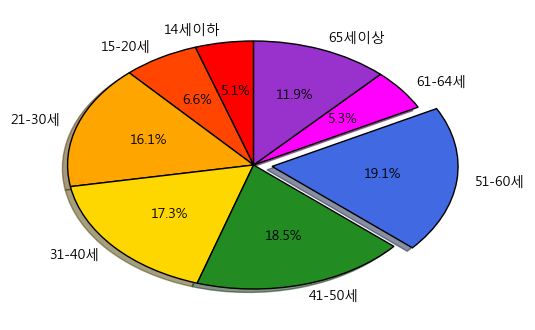

In [6]:
labels = ['14세이하','15-20세','21-30세','31-40세','41-50세','51-60세','61-64세','65세이상']
ratio = hurt_people[1:9]
explode = [0,0,0,0,0,0.1,0,0]
color = ['red', 'orangered','orange','gold','forestgreen','royalblue','magenta','darkorchid']
plt.pie(ratio, labels=labels, colors= color, shadow=True,autopct='%1.1f%%', explode = explode, startangle=90)

plt.show()

## Pie chart 기상

In [7]:
weather_data = pd.read_excel('hurt_weather_2016.xls')
weather_data = weather_data.dropna()
weather_data.columns = ['날씨','사상여부','사상자수']
weather_data = weather_data.drop(weather_data.where(weather_data['날씨']=='기상상태').dropna().index)
weather_data = weather_data.reset_index(drop=True)
hurt_people=[]
for i in range(7):
    hurt_people.append(weather_data.iloc[3*i+1]['사상자수'] + weather_data.iloc[3*i+2]['사상자수'])
hurt_people[1:] = hurt_people[1:]/hurt_people[0] * 100

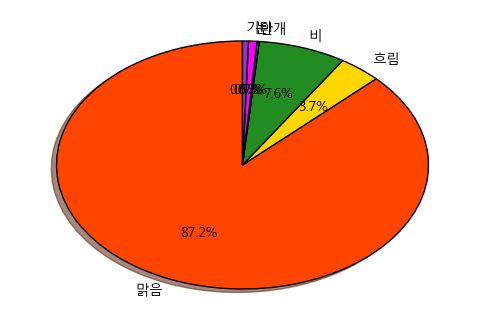

In [8]:
plt.close()
labels = ['맑음','흐림','비','안개','눈','기타']
ratio = hurt_people[1:]
colors = [ 'orangered','gold','forestgreen','royalblue','magenta','darkorchid']
explode = (0,0,0,0,0,0)
plt.pie(ratio, labels=labels, colors= colors, autopct='%1.1f%%', shadow=True, explode = explode, startangle=90)
plt.show()

## Pie chart 면허 소지자 

In [9]:
license_data = pd.read_excel('license.xls')
license_data.columns = license_data.iloc[0]
cols = ['10대 이하', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대 이상']
cal = []
for i in cols:
    cal.append(license_data.iloc[1][i].sum())
cal = cal/ np.sum(cal)*100

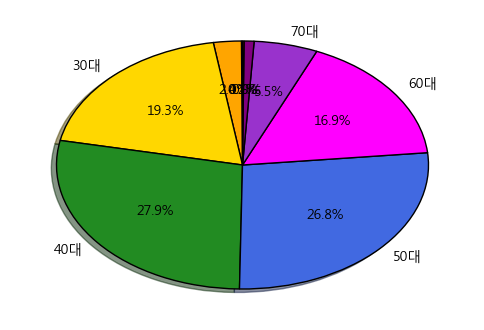

In [11]:
labels = ['', '', '30대', '40대', '50대', '60대', '70대', '', '']
ratio = cal

color = ['red','orange','gold','forestgreen','royalblue','magenta','darkorchid','purple']
plt.pie(ratio, labels=labels, colors = color,  autopct='%1.1f%%', shadow=True,startangle=90)

plt.show()

# 상관관계 분석

## 연령 - 법규위반

In [12]:
age_total = pd.read_excel('age_total.xlsx')
law_total = pd.read_excel('law_total.xlsx')
age_law = pd.merge(age_total, law_total, how = 'outer')
law_total.columns

Index(['date', '요일구분', '중앙선침범', '신호위반', '안전거리미확보', '불법유턴', '과속', '안전운전불이행',
       '교차로운행방법위반', '보행자보호의무위반', '차로위반', '직진우회전진행방해'],
      dtype='object')

In [13]:
age_col = ['20세이하', '20세~30세', '30세~40세', '40세~50세', '50세~60세',
       '60세~64세', '65세이상']
law_col = ['중앙선침범', '신호위반', '안전거리미확보', '불법유턴', '과속', '안전운전불이행',
       '교차로운행방법위반', '보행자보호의무위반', '차로위반', '직진우회전진행방해']
for a in age_col:
    for l in law_col:
        print('x = ',a, ' y = ',l)
        age_law.plot(x=a, y=l, linestyle='', marker='o')
        plt.xlim(age_law[a].min(),age_law[a].max())
        plt.ylim(age_law[l].min(),age_law[l].max())
        
        plt.savefig(a+'_'+l+'.png')
        #savefig하면 png로 다 저장됩니다.

x =  20세이하  y =  중앙선침범
x =  20세이하  y =  신호위반
x =  20세이하  y =  안전거리미확보
x =  20세이하  y =  불법유턴
x =  20세이하  y =  과속
x =  20세이하  y =  안전운전불이행
x =  20세이하  y =  교차로운행방법위반
x =  20세이하  y =  보행자보호의무위반
x =  20세이하  y =  차로위반
x =  20세이하  y =  직진우회전진행방해
x =  20세~30세  y =  중앙선침범
x =  20세~30세  y =  신호위반
x =  20세~30세  y =  안전거리미확보
x =  20세~30세  y =  불법유턴
x =  20세~30세  y =  과속
x =  20세~30세  y =  안전운전불이행
x =  20세~30세  y =  교차로운행방법위반
x =  20세~30세  y =  보행자보호의무위반
x =  20세~30세  y =  차로위반
x =  20세~30세  y =  직진우회전진행방해
x =  30세~40세  y =  중앙선침범
x =  30세~40세  y =  신호위반
x =  30세~40세  y =  안전거리미확보


C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


x =  30세~40세  y =  불법유턴
x =  30세~40세  y =  과속
x =  30세~40세  y =  안전운전불이행
x =  30세~40세  y =  교차로운행방법위반
x =  30세~40세  y =  보행자보호의무위반
x =  30세~40세  y =  차로위반
x =  30세~40세  y =  직진우회전진행방해
x =  40세~50세  y =  중앙선침범
x =  40세~50세  y =  신호위반
x =  40세~50세  y =  안전거리미확보
x =  40세~50세  y =  불법유턴
x =  40세~50세  y =  과속
x =  40세~50세  y =  안전운전불이행
x =  40세~50세  y =  교차로운행방법위반
x =  40세~50세  y =  보행자보호의무위반
x =  40세~50세  y =  차로위반
x =  40세~50세  y =  직진우회전진행방해
x =  50세~60세  y =  중앙선침범
x =  50세~60세  y =  신호위반
x =  50세~60세  y =  안전거리미확보
x =  50세~60세  y =  불법유턴
x =  50세~60세  y =  과속
x =  50세~60세  y =  안전운전불이행
x =  50세~60세  y =  교차로운행방법위반
x =  50세~60세  y =  보행자보호의무위반
x =  50세~60세  y =  차로위반
x =  50세~60세  y =  직진우회전진행방해
x =  60세~64세  y =  중앙선침범
x =  60세~64세  y =  신호위반
x =  60세~64세  y =  안전거리미확보
x =  60세~64세  y =  불법유턴
x =  60세~64세  y =  과속
x =  60세~64세  y =  안전운전불이행
x =  60세~64세  y =  교차로운행방법위반
x =  60세~64세  y =  보행자보호의무위반
x =  60세~64세  y =  차로위반
x =  60세~64세  y =  직진우회전진행방해
x =  65세이상  y =  중앙선침범
x =  65세이상  y

In [14]:
for a in age_col:
    for l in law_col:
        x = np.array(age_law[a])
        y = np.array(age_law[l])
        corrcoef = np.corrcoef(x,y)
        print(a ,'와' ,l ,'의 상관계수 = ',corrcoef[0][1])

20세이하 와 중앙선침범 의 상관계수 =  0.269451468342
20세이하 와 신호위반 의 상관계수 =  0.274706104255
20세이하 와 안전거리미확보 의 상관계수 =  0.215918589172
20세이하 와 불법유턴 의 상관계수 =  nan
20세이하 와 과속 의 상관계수 =  0.0634001108253
20세이하 와 안전운전불이행 의 상관계수 =  0.507850169325
20세이하 와 교차로운행방법위반 의 상관계수 =  0.383366121516
20세이하 와 보행자보호의무위반 의 상관계수 =  0.236158679776
20세이하 와 차로위반 의 상관계수 =  0.233219507024
20세이하 와 직진우회전진행방해 의 상관계수 =  0.342240426316
20세~30세 와 중앙선침범 의 상관계수 =  0.564430023335
20세~30세 와 신호위반 의 상관계수 =  0.553260655331
20세~30세 와 안전거리미확보 의 상관계수 =  0.751910838288
20세~30세 와 불법유턴 의 상관계수 =  nan
20세~30세 와 과속 의 상관계수 =  0.0417842082733
20세~30세 와 안전운전불이행 의 상관계수 =  0.68787455476
20세~30세 와 교차로운행방법위반 의 상관계수 =  0.458603270685
20세~30세 와 보행자보호의무위반 의 상관계수 =  0.465357020646
20세~30세 와 차로위반 의 상관계수 =  0.39320310413
20세~30세 와 직진우회전진행방해 의 상관계수 =  0.37230849156
30세~40세 와 중앙선침범 의 상관계수 =  0.622332066359
30세~40세 와 신호위반 의 상관계수 =  0.651299866937
30세~40세 와 안전거리미확보 의 상관계수 =  0.72774704821
30세~40세 와 불법유턴 의 상관계수 =  nan
30세~40세 와 과속 의 상관계수 =  -0.0417755409311
30세~40세 와 안

## 도로형태 - 법규위반 

In [15]:
road_2014 = pd.read_excel('2014년 도로형태.xlsx')
road_2015 = pd.read_excel('2015년 도로형태.xlsx')
road_2016 = pd.read_excel('2016년 도로형태.xlsx')
law_total = pd.read_excel('law_total.xlsx')

In [16]:
road_total = pd.merge(road_2014, road_2015, how='outer')
road_total = pd.merge(road_total, road_2016, how='outer')
# '-'문자 0으로 바꾸기
road_total['철길건널목'] = road_total['철길건널목'].fillna(0).astype(int)
road_total.columns = ['date', '요일구분', '교차로안', '교차로부근', '횡단보도상', '횡단보도부근', '터널', '교량', '철길건널목'] 
writer = pd.ExcelWriter('road_total.xlsx')
road_total.to_excel(writer,'Sheet1')
writer.save()

In [17]:
road_law = pd.merge(road_total, law_total, how='outer')

In [18]:
road_col = ['교차로안', '교차로부근', '횡단보도상', '횡단보도부근', '터널', '교량',
       '철길건널목']
law_col = ['중앙선침범', '신호위반', '안전거리미확보', '불법유턴', '과속', '안전운전불이행',
       '교차로운행방법위반', '보행자보호의무위반', '차로위반', '직진우회전진행방해']

for r in road_col:
    for l in law_col:
        print('x = ',r, ' y = ',l)
        road_law.plot(x=r, y=l, linestyle='', marker='o')
        plt.xlim(road_law[r].min(),road_law[r].max())
        plt.ylim(road_law[l].min(),road_law[l].max())
        
        #plt.savefig(r+'_'+l+'.png')

x =  교차로안  y =  중앙선침범
x =  교차로안  y =  신호위반


C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


x =  교차로안  y =  안전거리미확보
x =  교차로안  y =  불법유턴
x =  교차로안  y =  과속
x =  교차로안  y =  안전운전불이행
x =  교차로안  y =  교차로운행방법위반
x =  교차로안  y =  보행자보호의무위반
x =  교차로안  y =  차로위반
x =  교차로안  y =  직진우회전진행방해
x =  교차로부근  y =  중앙선침범
x =  교차로부근  y =  신호위반
x =  교차로부근  y =  안전거리미확보
x =  교차로부근  y =  불법유턴
x =  교차로부근  y =  과속
x =  교차로부근  y =  안전운전불이행
x =  교차로부근  y =  교차로운행방법위반
x =  교차로부근  y =  보행자보호의무위반
x =  교차로부근  y =  차로위반
x =  교차로부근  y =  직진우회전진행방해
x =  횡단보도상  y =  중앙선침범
x =  횡단보도상  y =  신호위반
x =  횡단보도상  y =  안전거리미확보
x =  횡단보도상  y =  불법유턴
x =  횡단보도상  y =  과속
x =  횡단보도상  y =  안전운전불이행
x =  횡단보도상  y =  교차로운행방법위반
x =  횡단보도상  y =  보행자보호의무위반
x =  횡단보도상  y =  차로위반
x =  횡단보도상  y =  직진우회전진행방해
x =  횡단보도부근  y =  중앙선침범
x =  횡단보도부근  y =  신호위반
x =  횡단보도부근  y =  안전거리미확보
x =  횡단보도부근  y =  불법유턴
x =  횡단보도부근  y =  과속
x =  횡단보도부근  y =  안전운전불이행
x =  횡단보도부근  y =  교차로운행방법위반
x =  횡단보도부근  y =  보행자보호의무위반
x =  횡단보도부근  y =  차로위반
x =  횡단보도부근  y =  직진우회전진행방해
x =  터널  y =  중앙선침범


C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


x =  터널  y =  신호위반
x =  터널  y =  안전거리미확보
x =  터널  y =  불법유턴
x =  터널  y =  과속
x =  터널  y =  안전운전불이행
x =  터널  y =  교차로운행방법위반
x =  터널  y =  보행자보호의무위반
x =  터널  y =  차로위반
x =  터널  y =  직진우회전진행방해
x =  교량  y =  중앙선침범
x =  교량  y =  신호위반
x =  교량  y =  안전거리미확보
x =  교량  y =  불법유턴
x =  교량  y =  과속
x =  교량  y =  안전운전불이행
x =  교량  y =  교차로운행방법위반
x =  교량  y =  보행자보호의무위반
x =  교량  y =  차로위반
x =  교량  y =  직진우회전진행방해
x =  철길건널목  y =  중앙선침범
x =  철길건널목  y =  신호위반
x =  철길건널목  y =  안전거리미확보
x =  철길건널목  y =  불법유턴
x =  철길건널목  y =  과속
x =  철길건널목  y =  안전운전불이행
x =  철길건널목  y =  교차로운행방법위반
x =  철길건널목  y =  보행자보호의무위반
x =  철길건널목  y =  차로위반
x =  철길건널목  y =  직진우회전진행방해


In [19]:
road_col = ['교차로안', '교차로부근', '횡단보도상', '횡단보도부근', '터널', '교량',
       '철길건널목']
law_col = ['중앙선침범', '신호위반', '안전거리미확보', '불법유턴', '과속', '안전운전불이행',
       '교차로운행방법위반', '보행자보호의무위반', '차로위반', '직진우회전진행방해']
for a in road_col:
    for l in law_col:
        x = np.array(road_law[a])
        y = np.array(road_law[l])
        corrcoef = np.corrcoef(x,y)
        #print(a ,'와' ,l ,'의 상관계수 = ',corrcoef[0][1])

# OECD 국가의 행복지수와 사고의 관계

In [20]:
data = pd.read_csv('국가별 교통사고.csv', engine = 'python')
data.columns = data.iloc[1,:]
data = data.drop([0,1])
data.iloc[:,1] = data.iloc[:,1].str.replace('-','0')
data = data.drop(data.columns[2:],axis=1)
happiness = pd.read_excel('OECD 행복지수.xlsx')
df = pd.merge(data,happiness,how='outer')
df = df[df['교통사고발생건수(건)'] != '0']
df.iloc[:,1] = df.iloc[:,1].str.replace(',','').astype(int)
df = df.sort_values('교통사고발생건수(건)')

C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


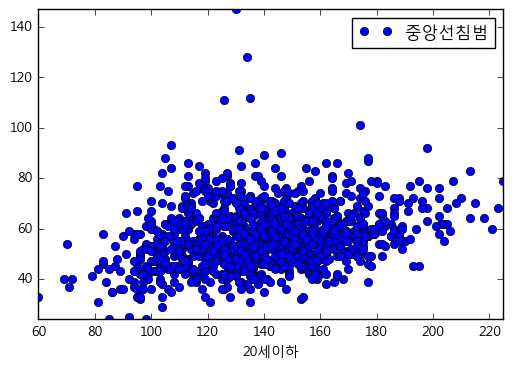

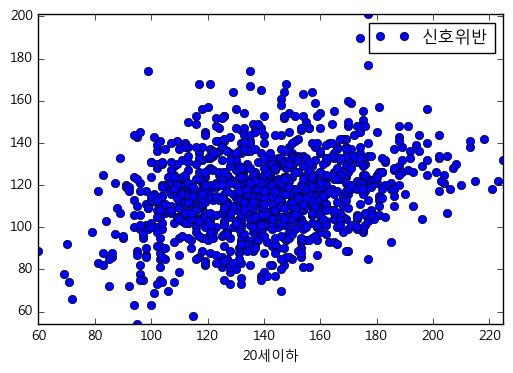

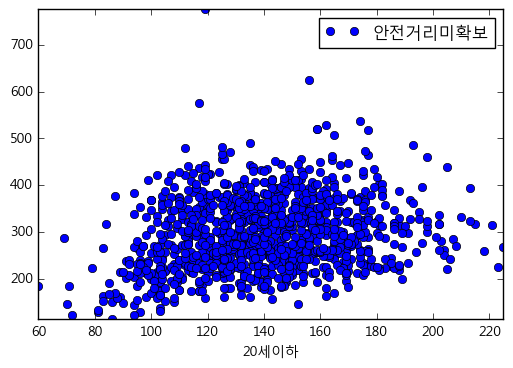

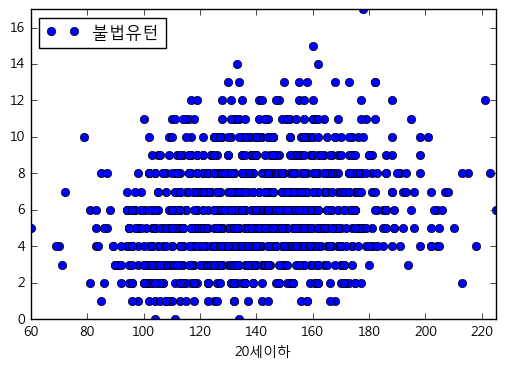

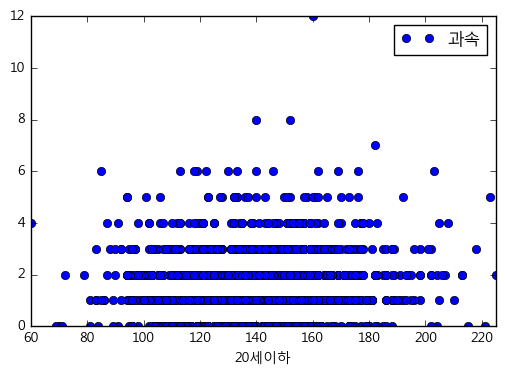

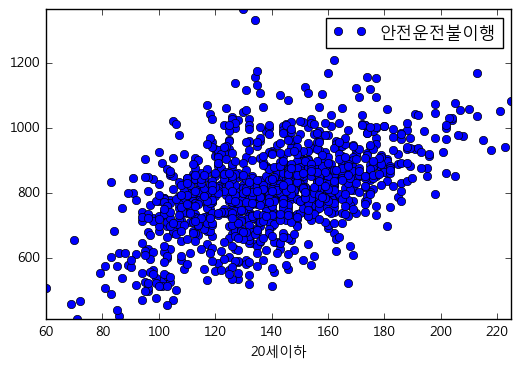

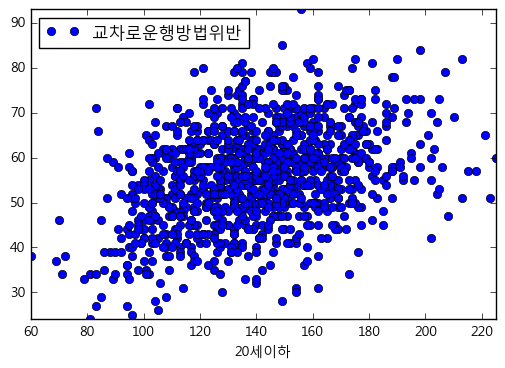

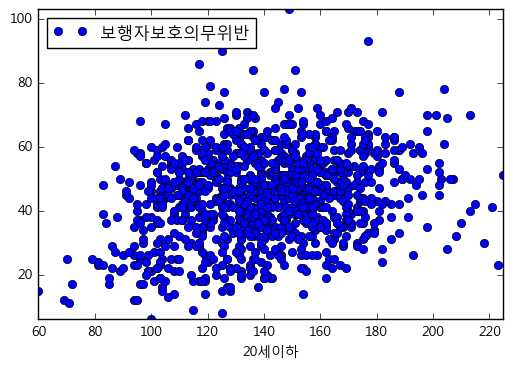

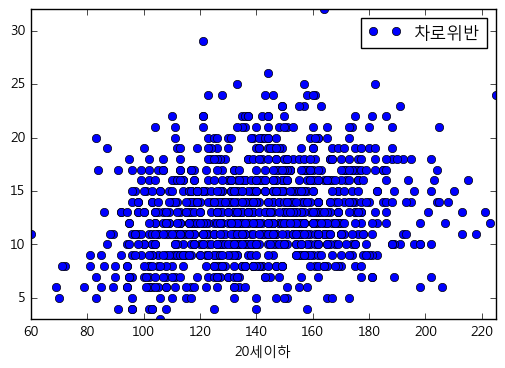

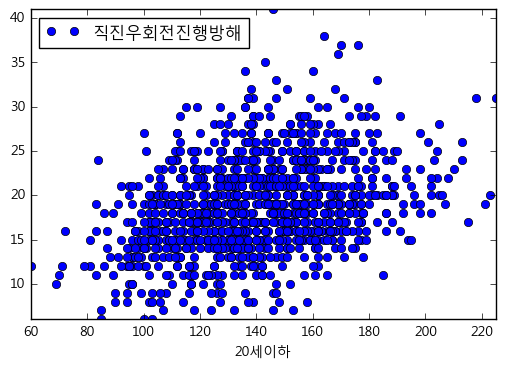

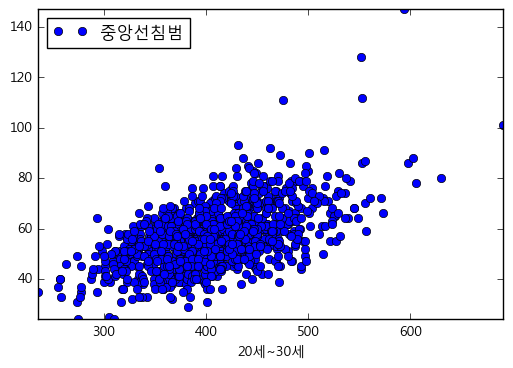

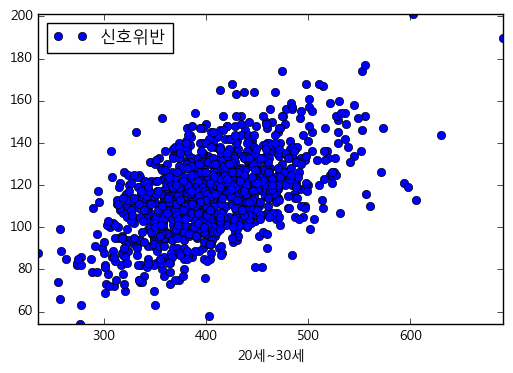

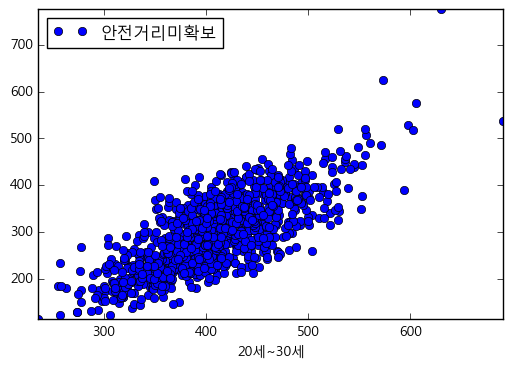

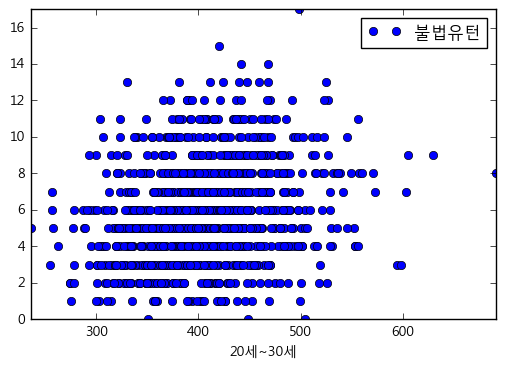

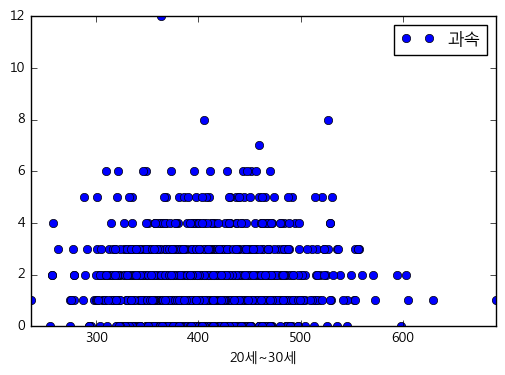

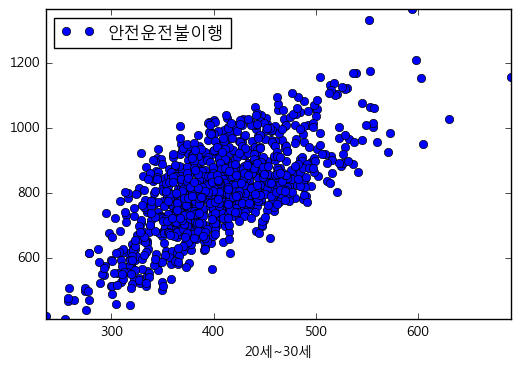

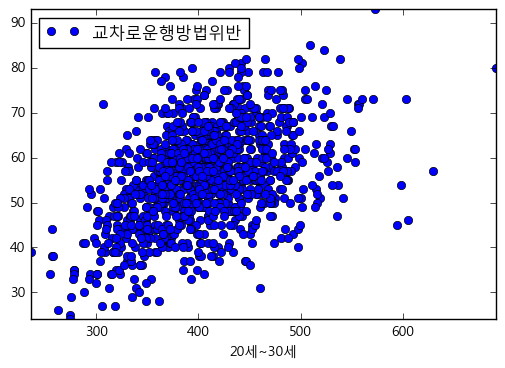

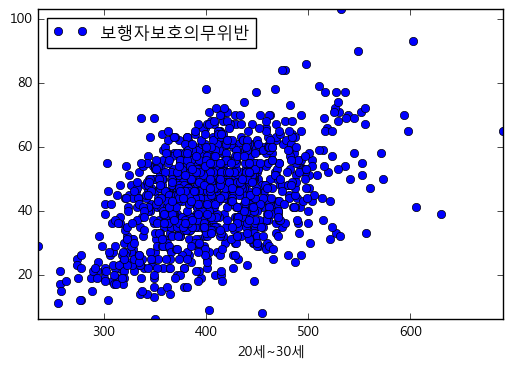

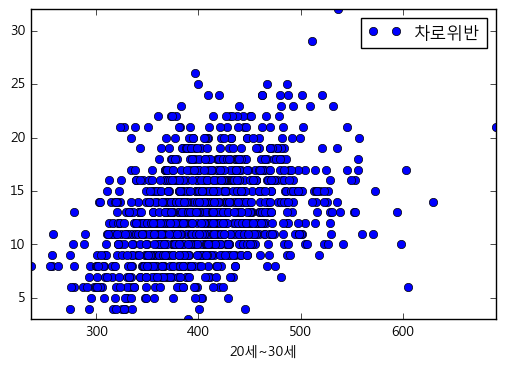

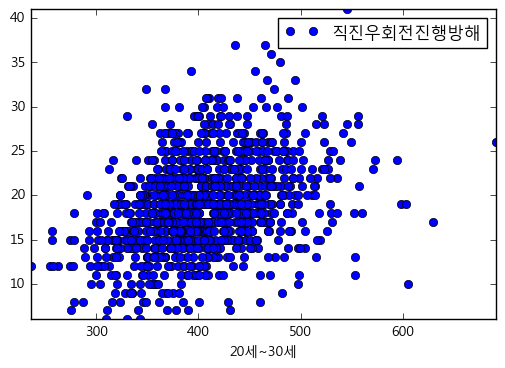

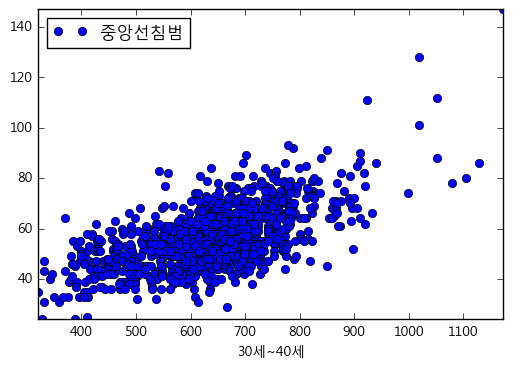

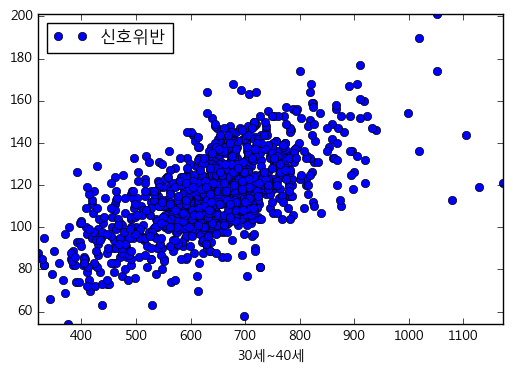

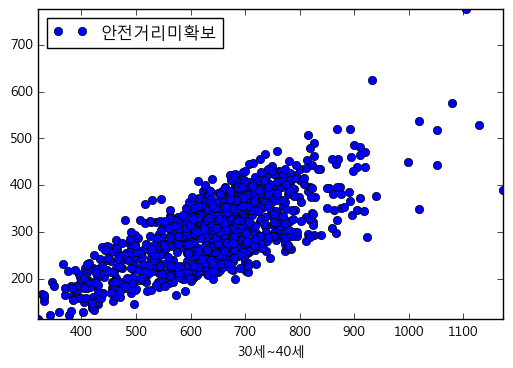

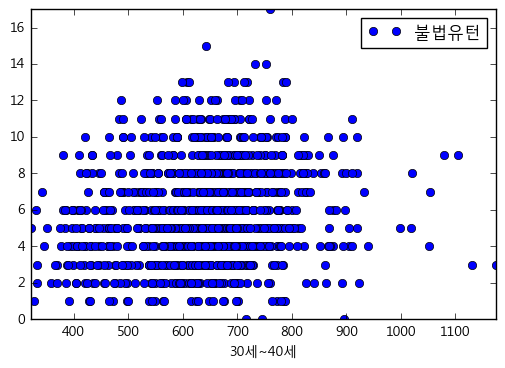

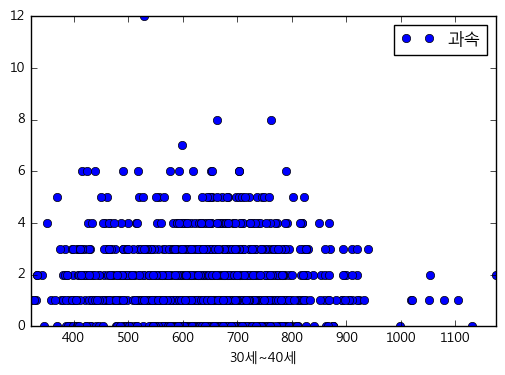

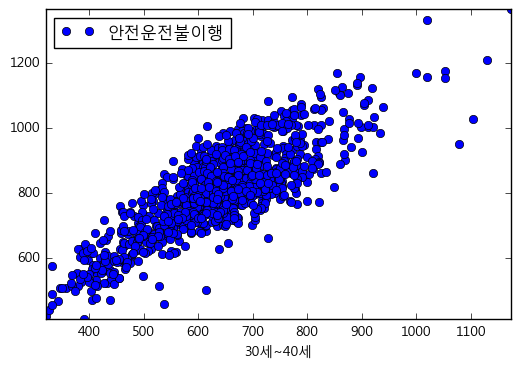

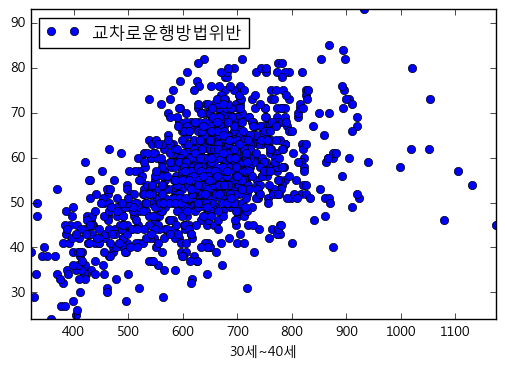

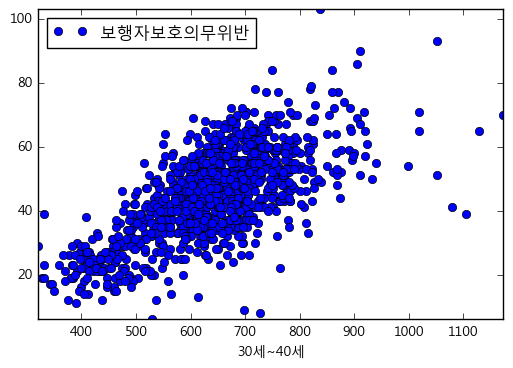

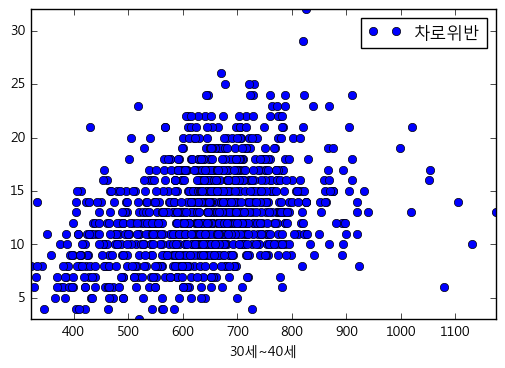

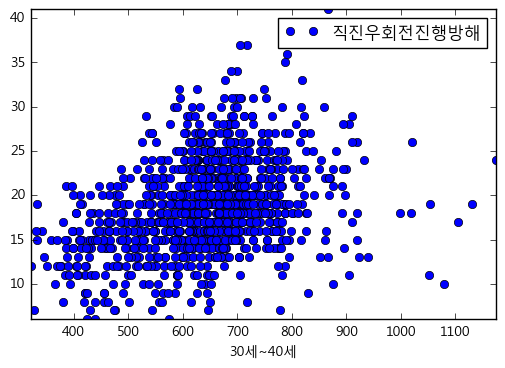

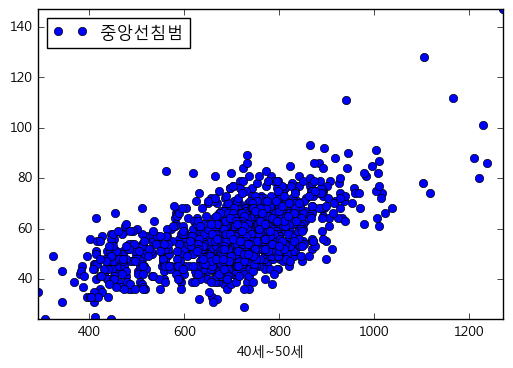

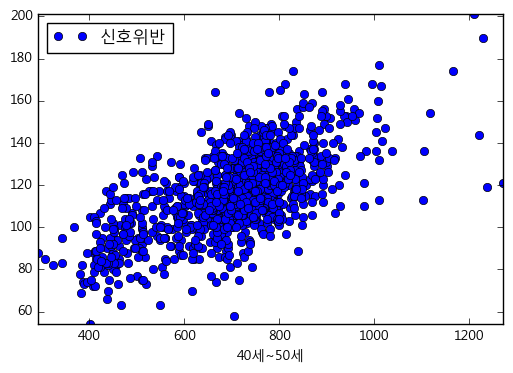

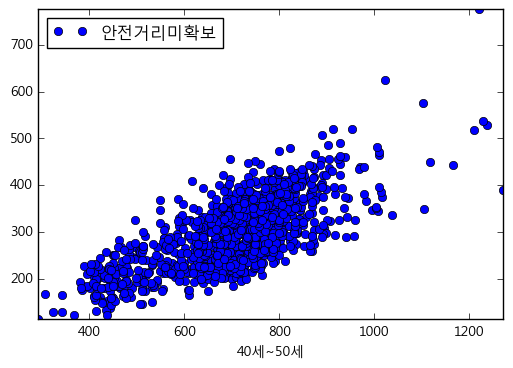

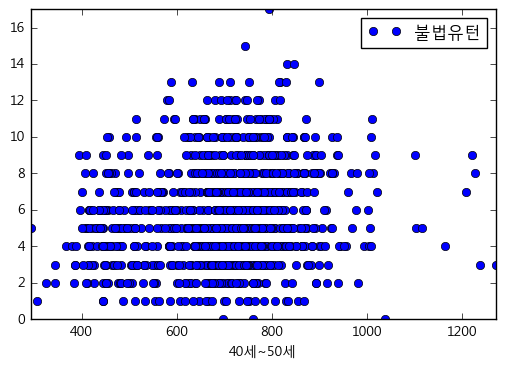

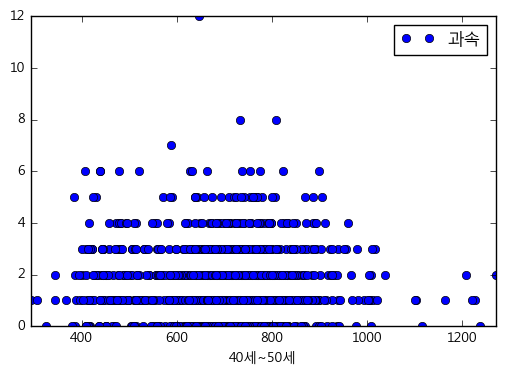

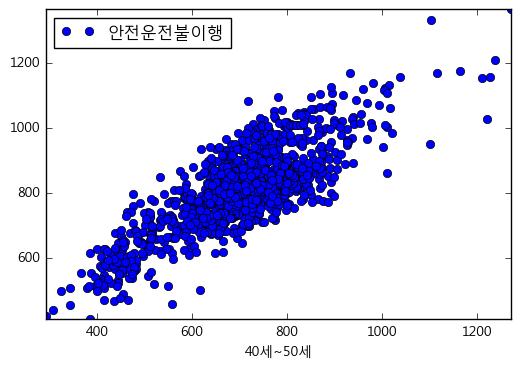

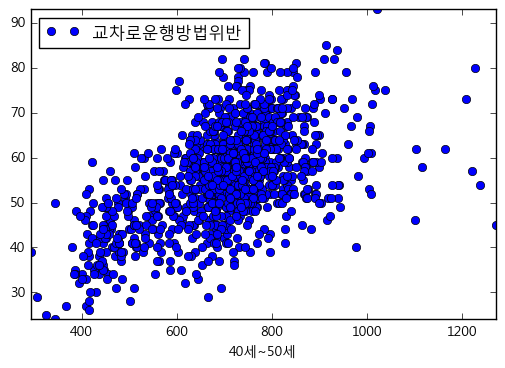

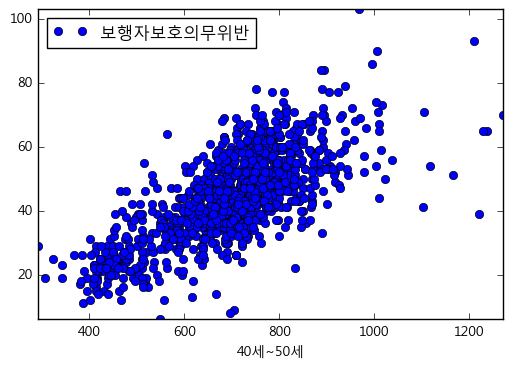

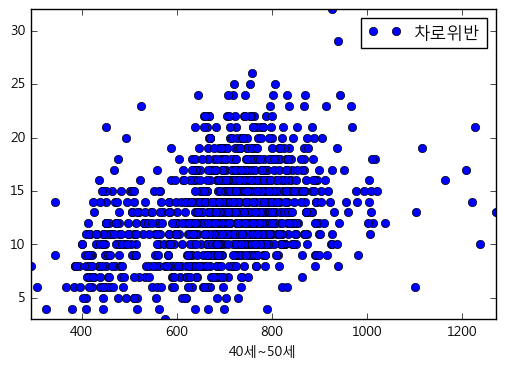

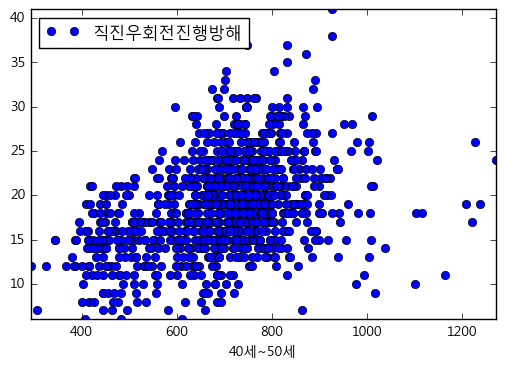

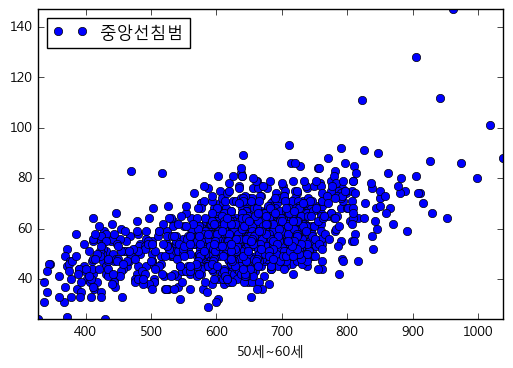

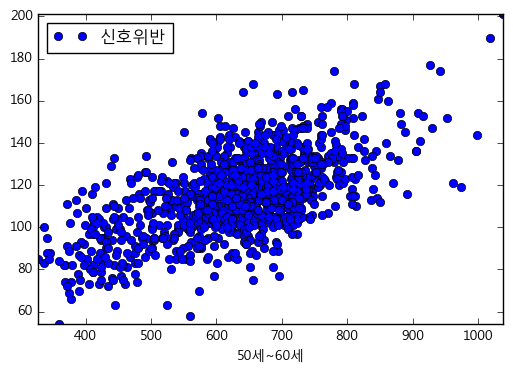

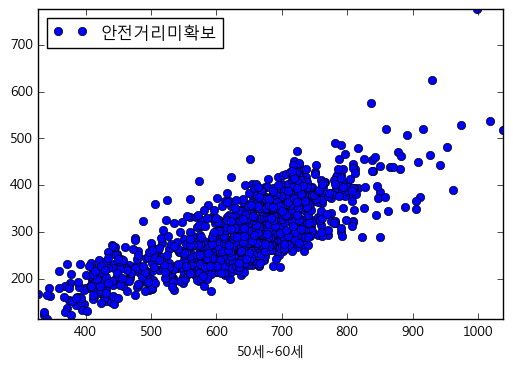

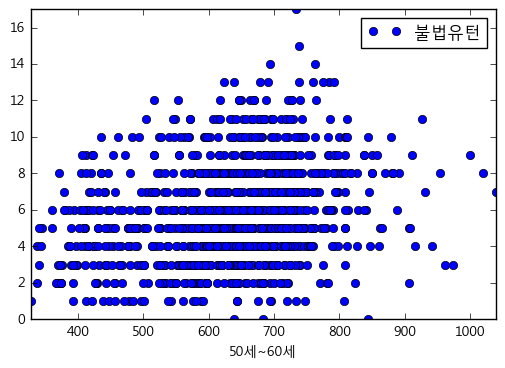

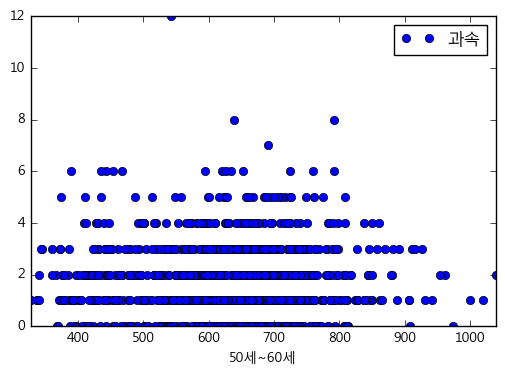

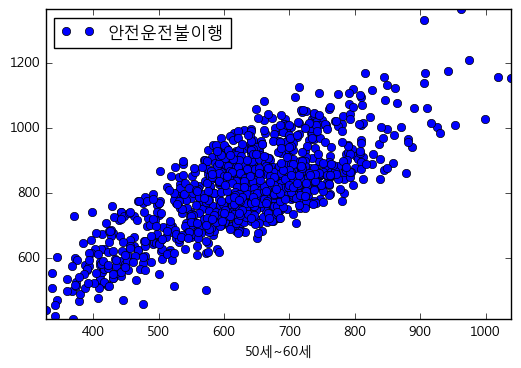

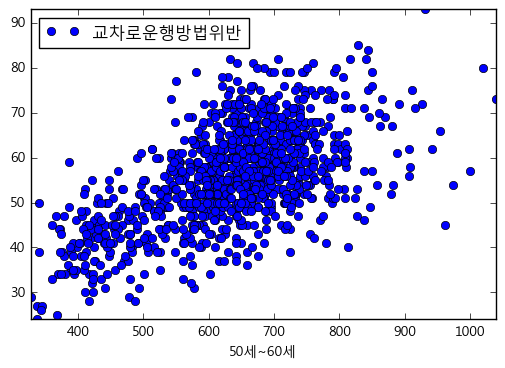

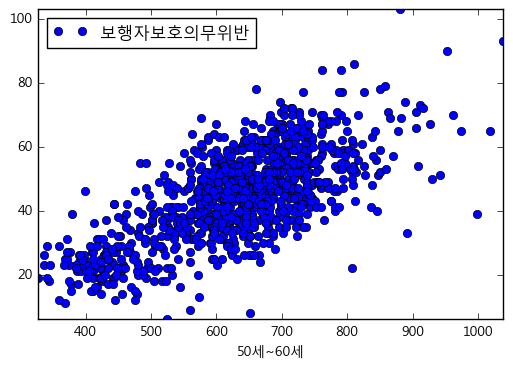

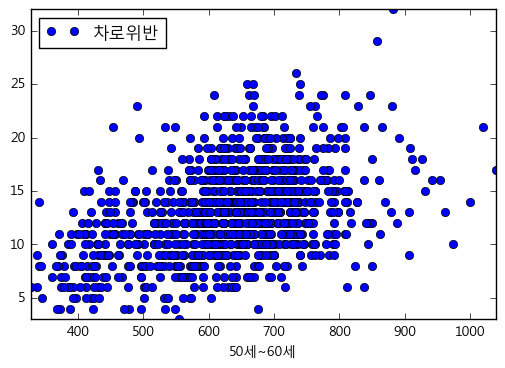

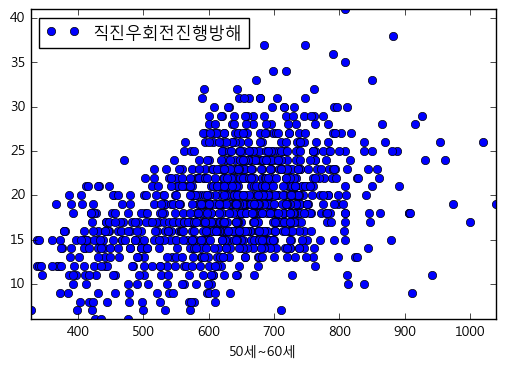

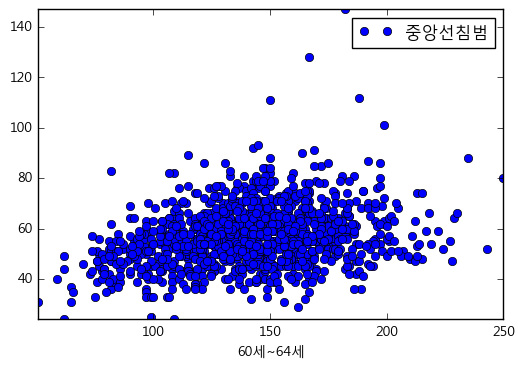

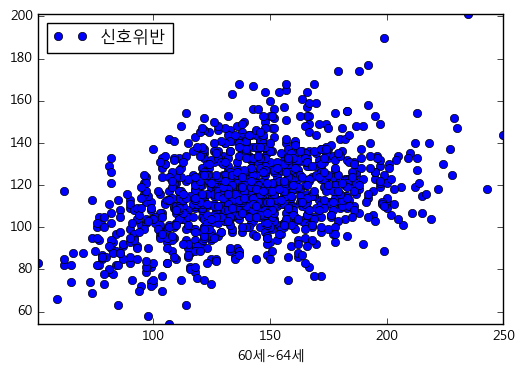

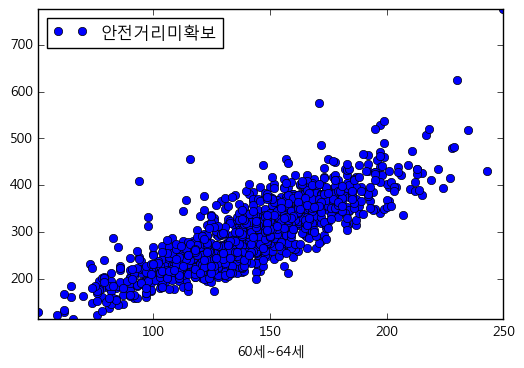

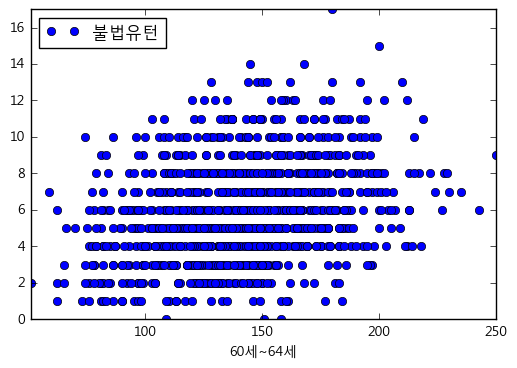

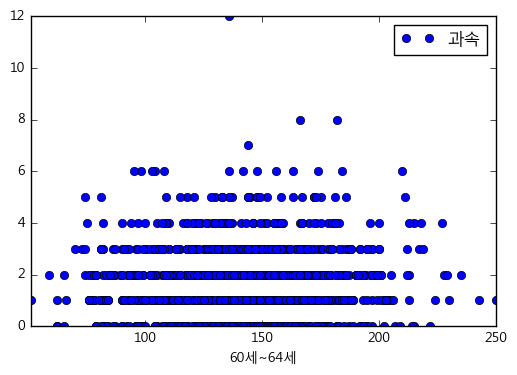

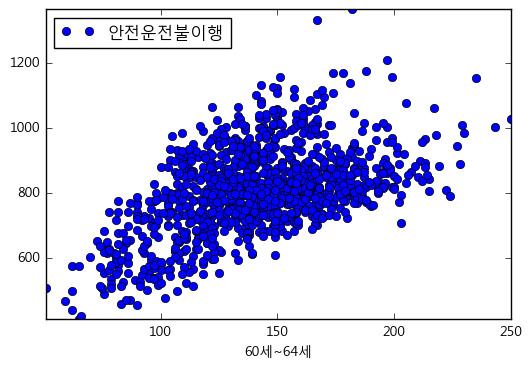

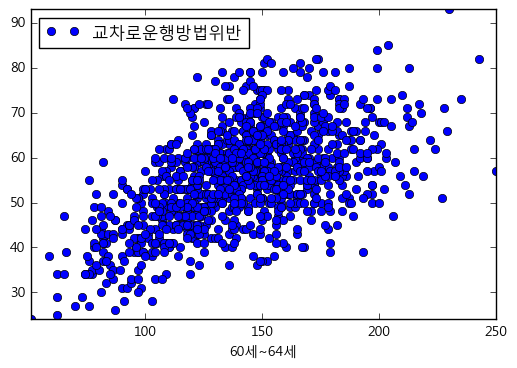

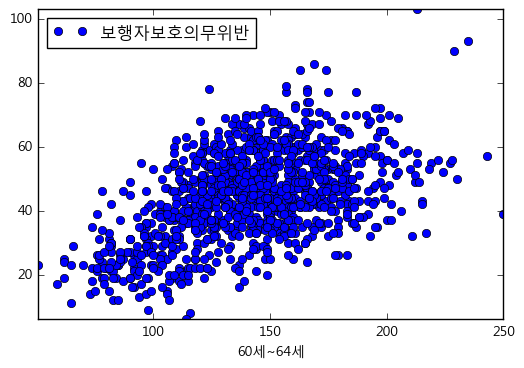

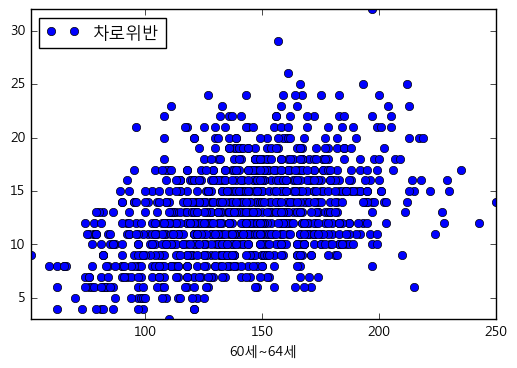

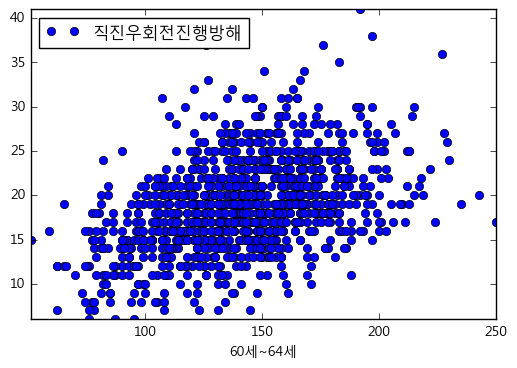

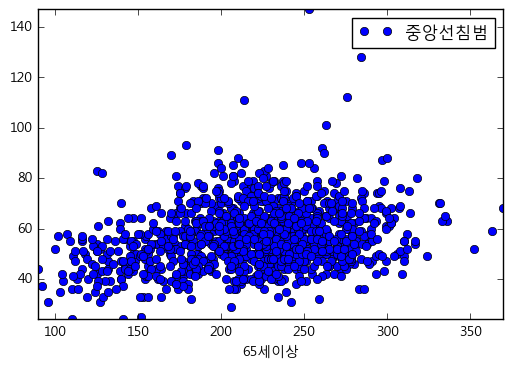

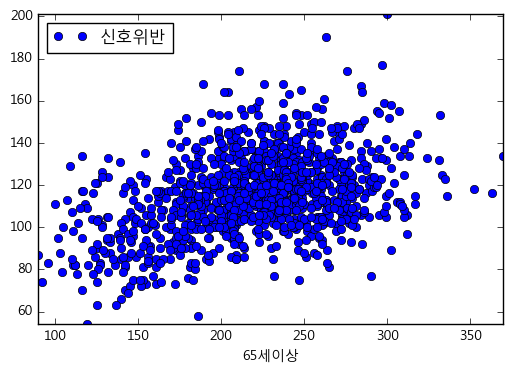

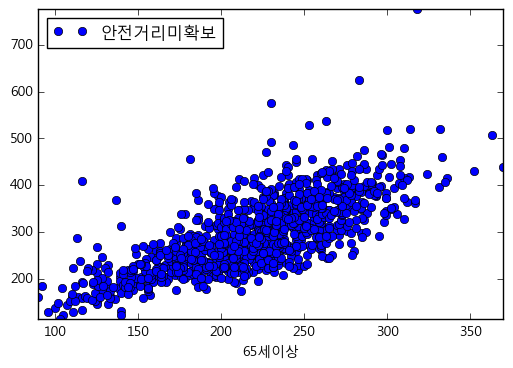

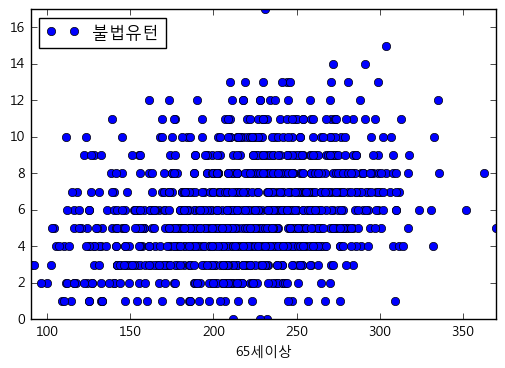

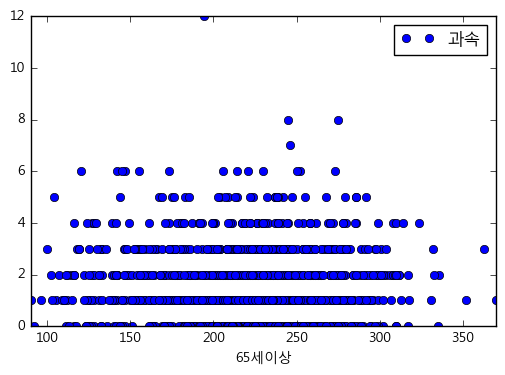

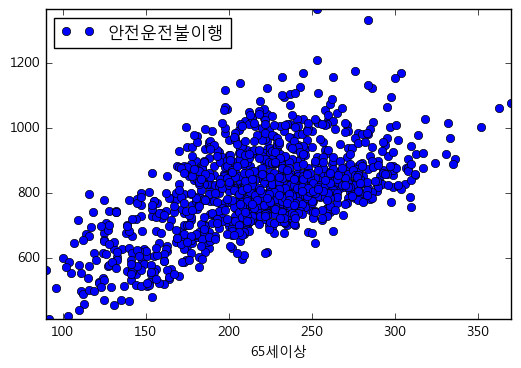

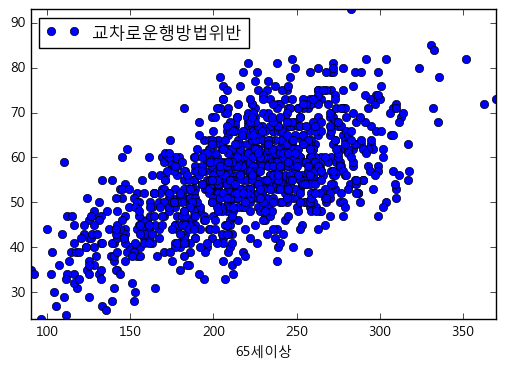

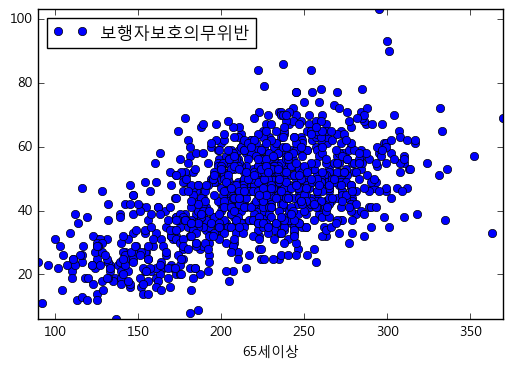

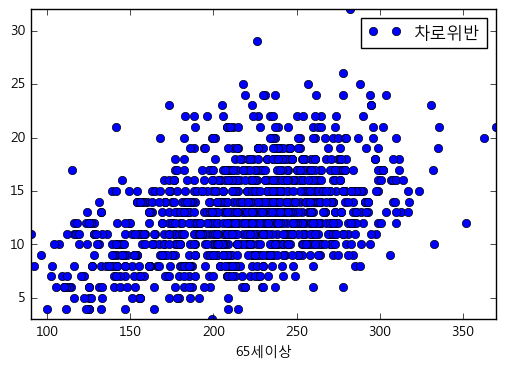

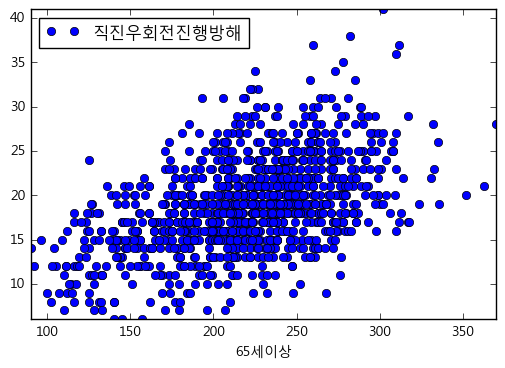

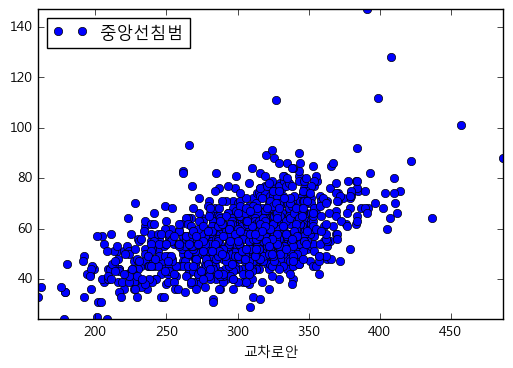

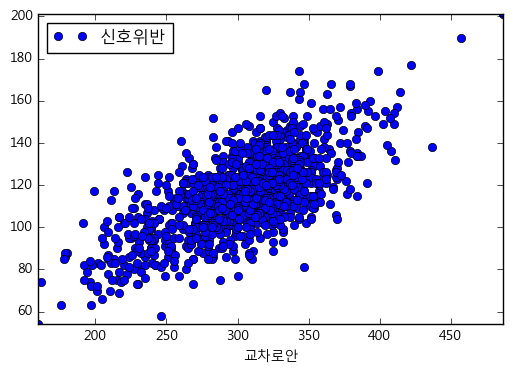

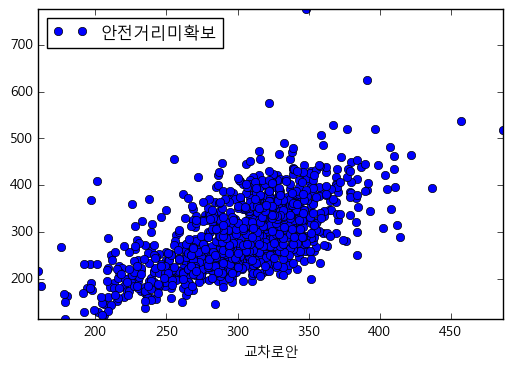

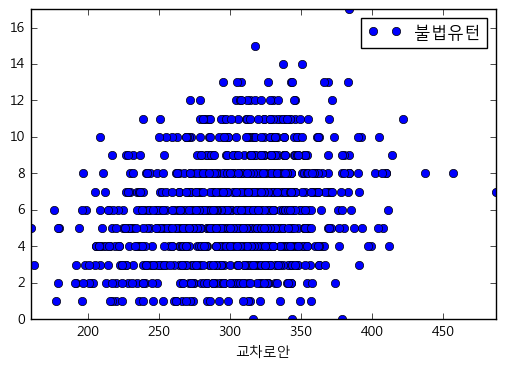

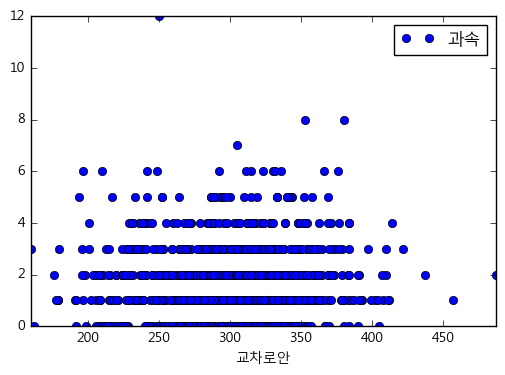

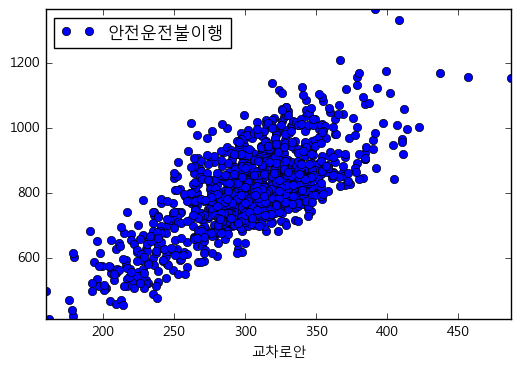

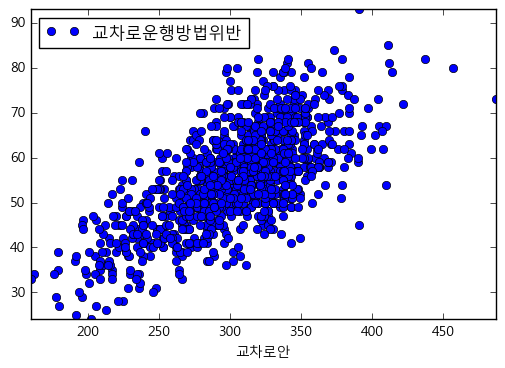

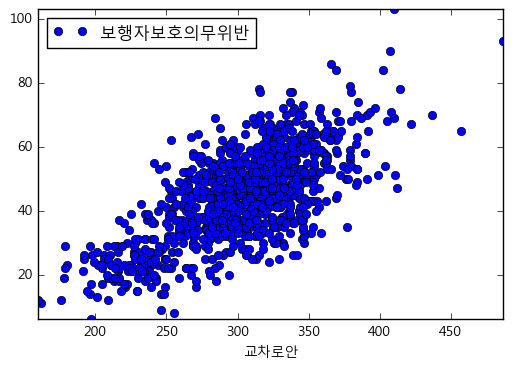

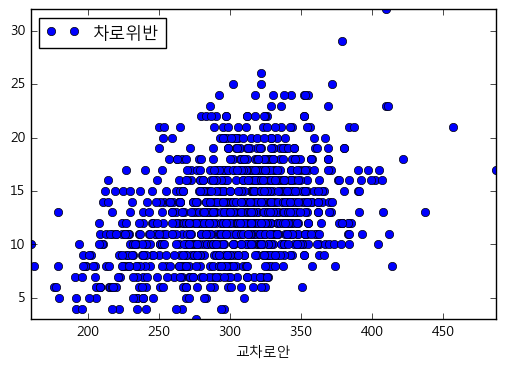

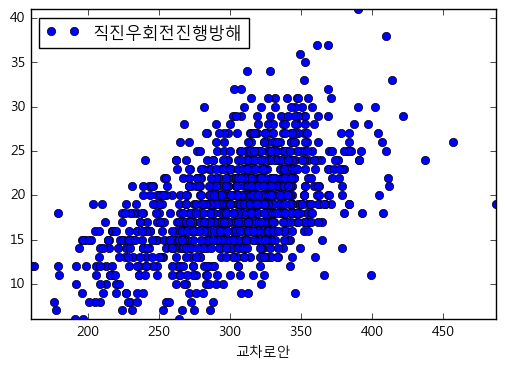

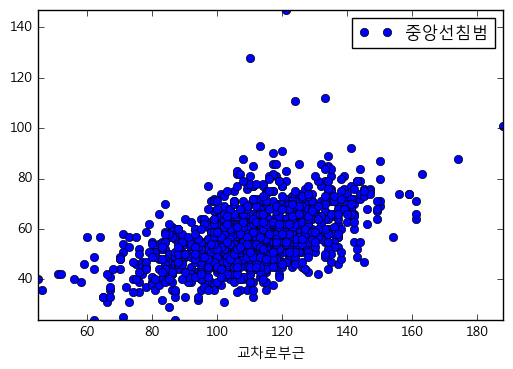

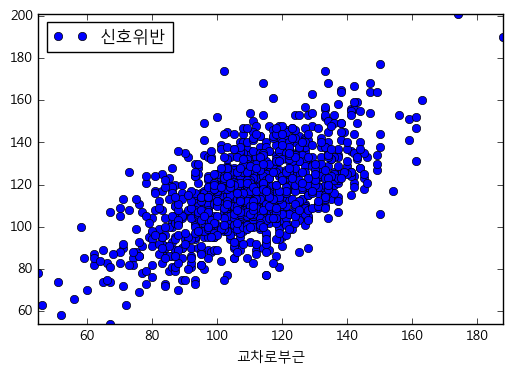

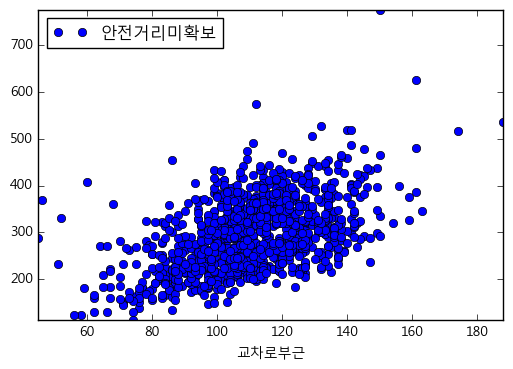

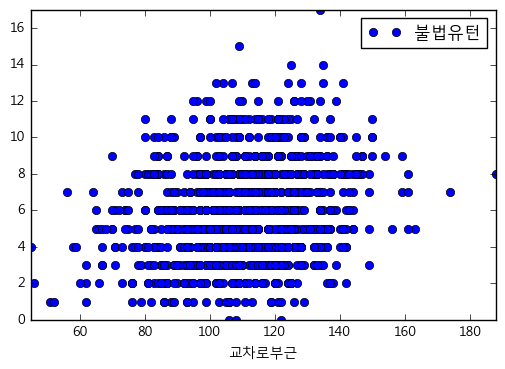

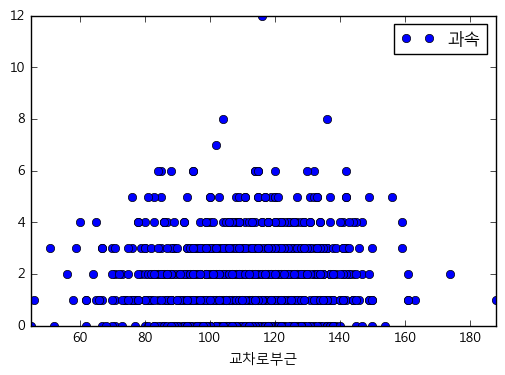

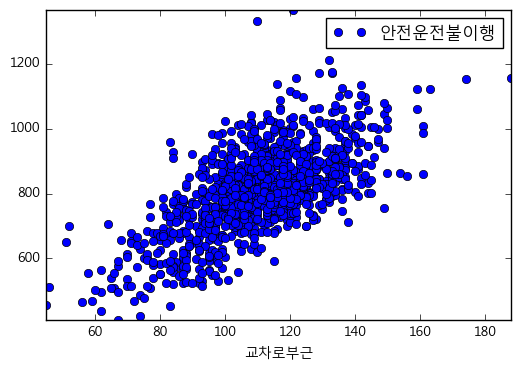

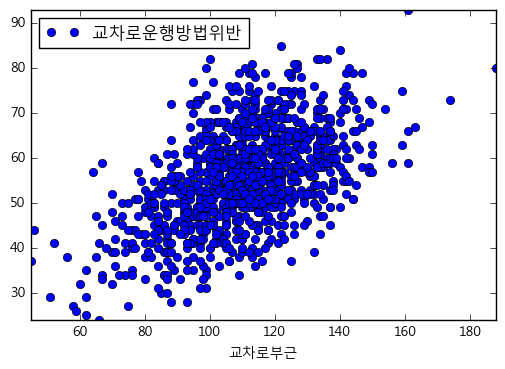

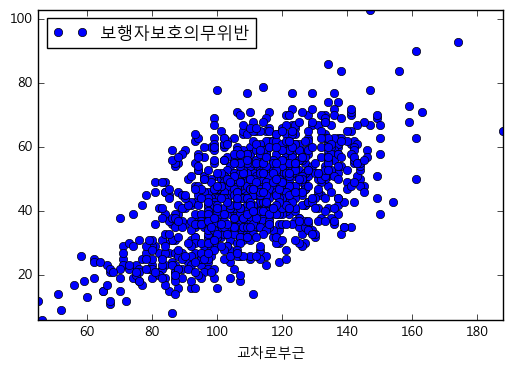

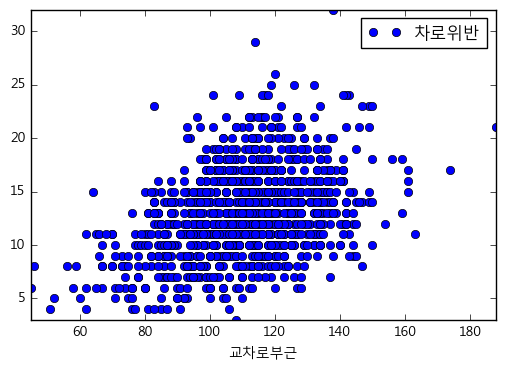

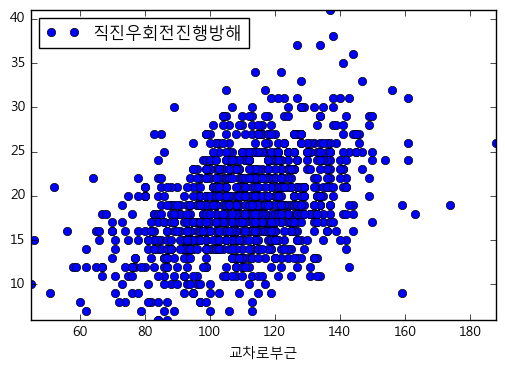

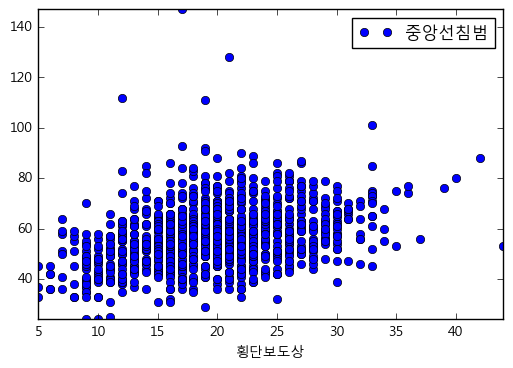

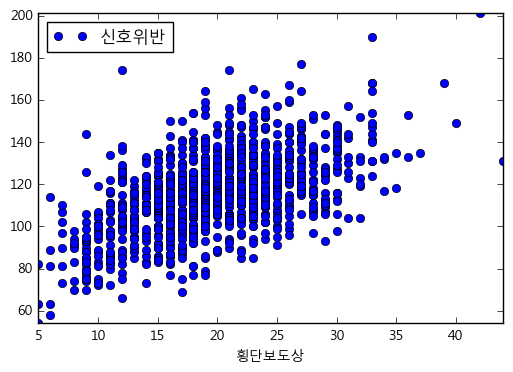

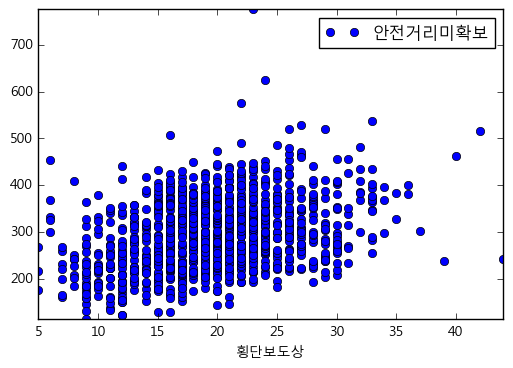

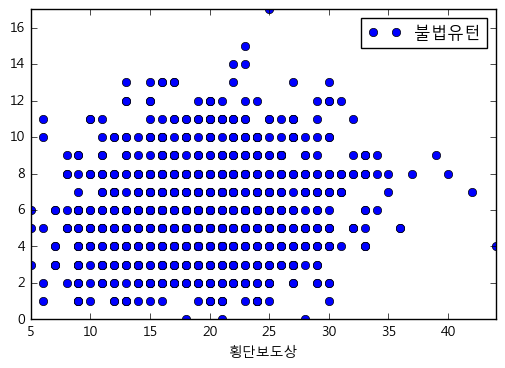

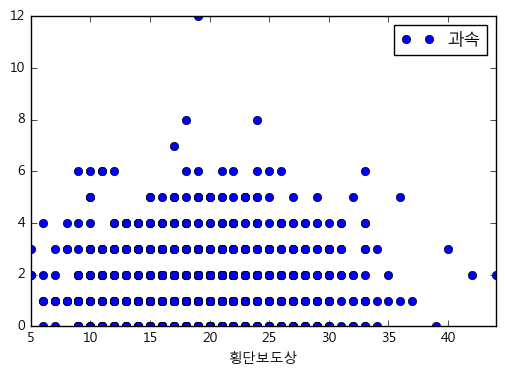

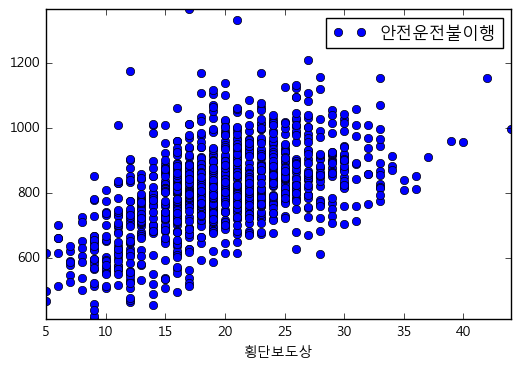

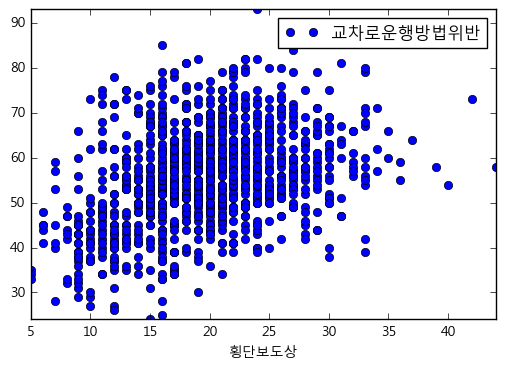

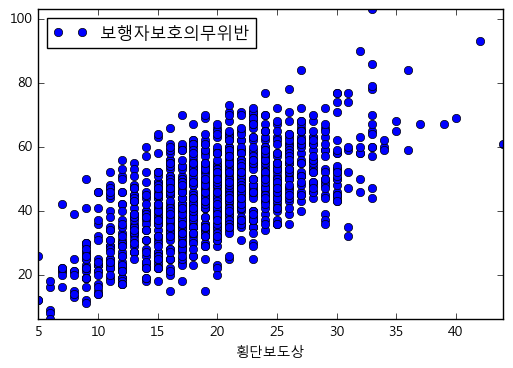

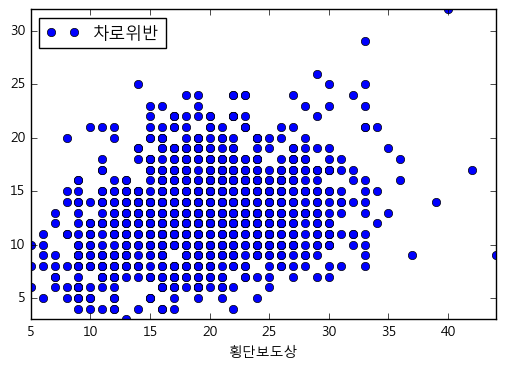

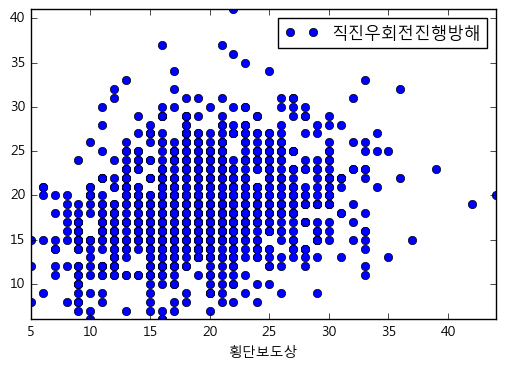

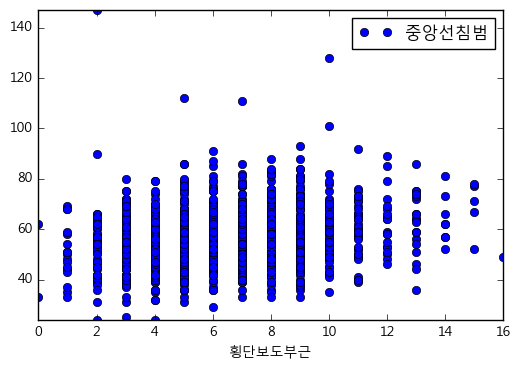

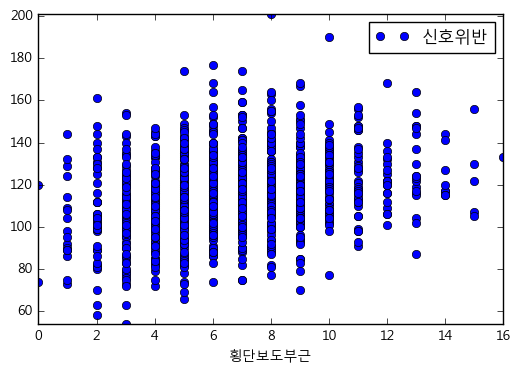

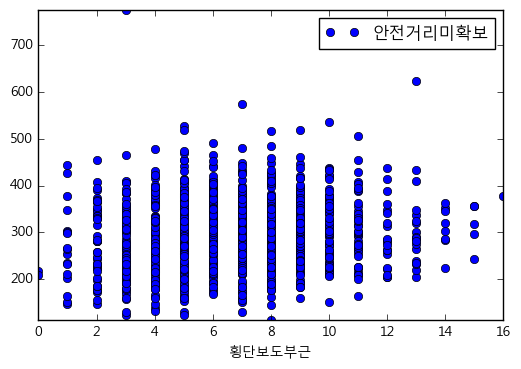

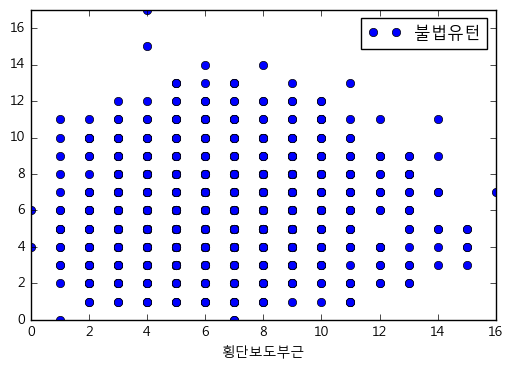

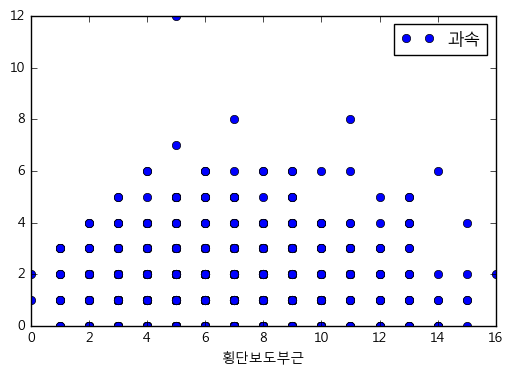

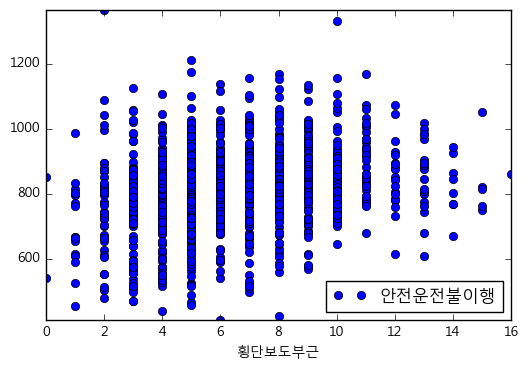

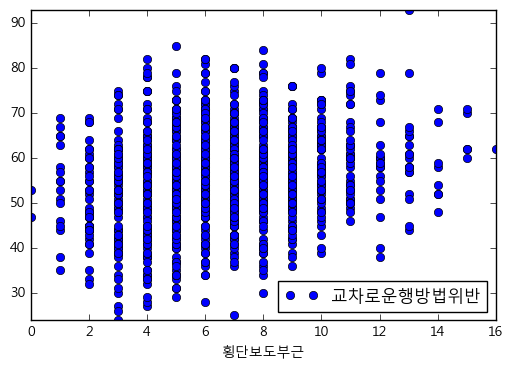

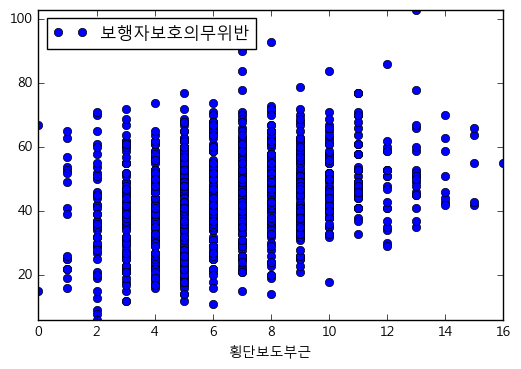

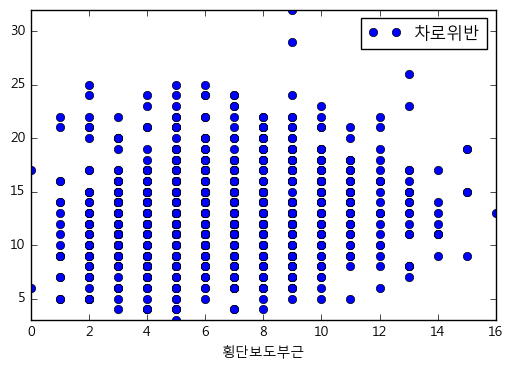

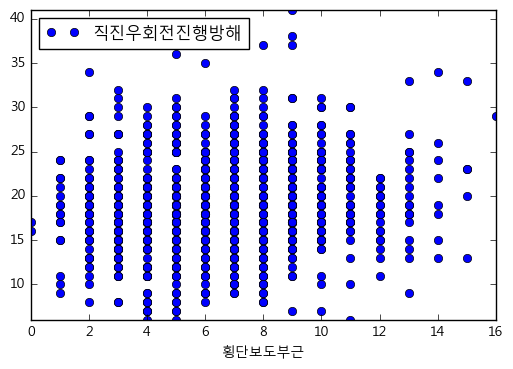

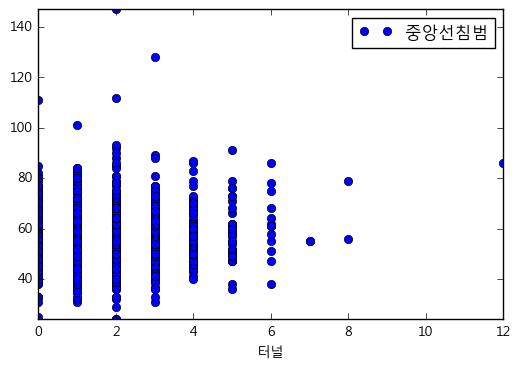

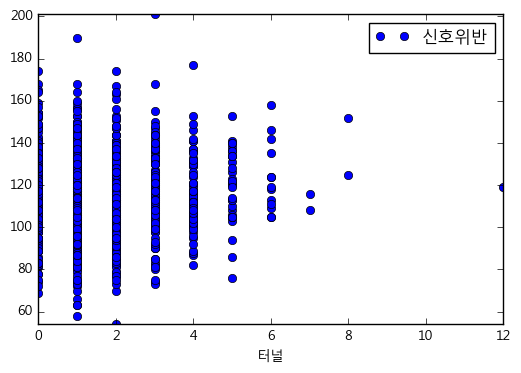

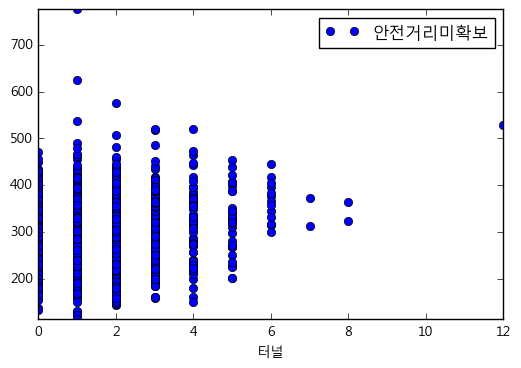

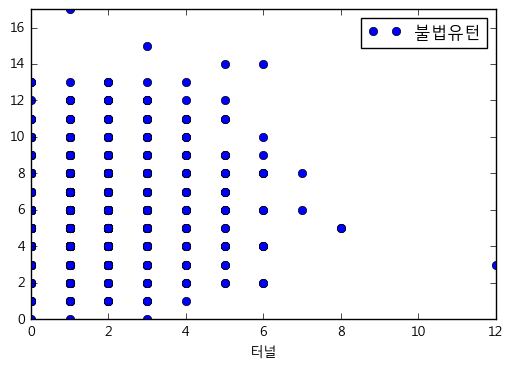

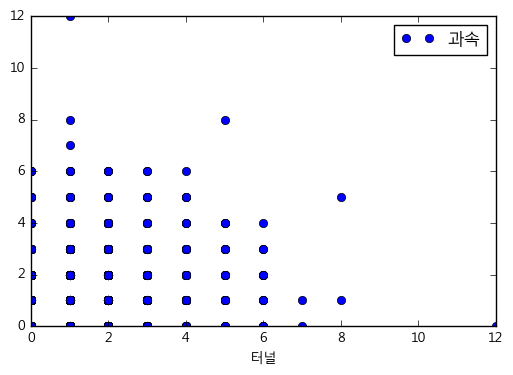

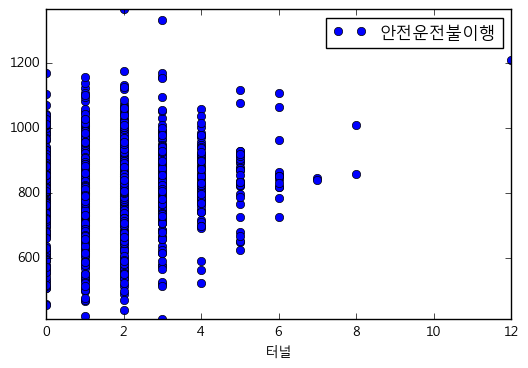

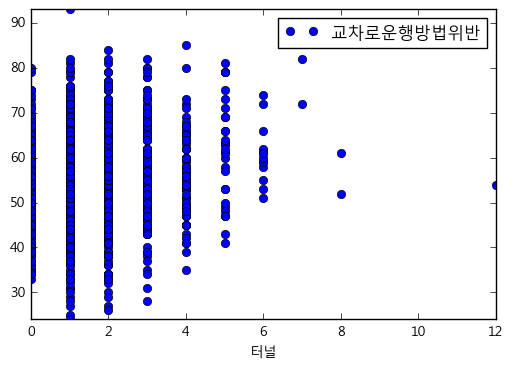

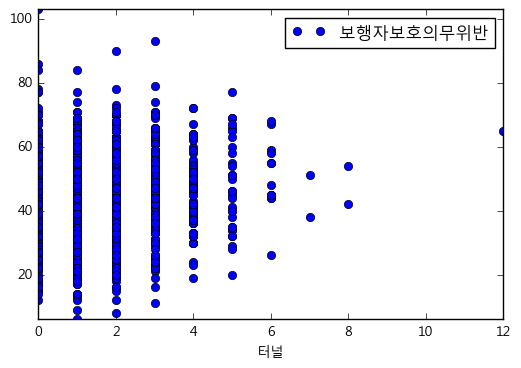

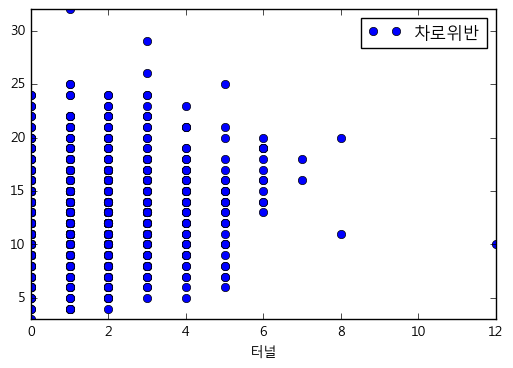

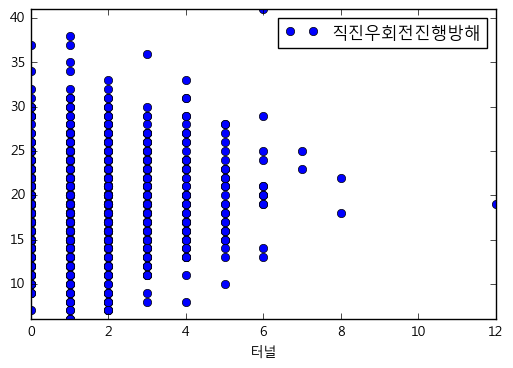

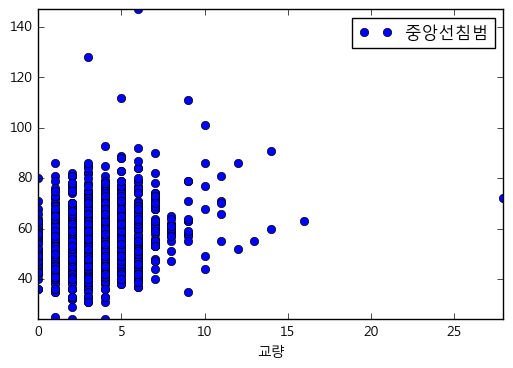

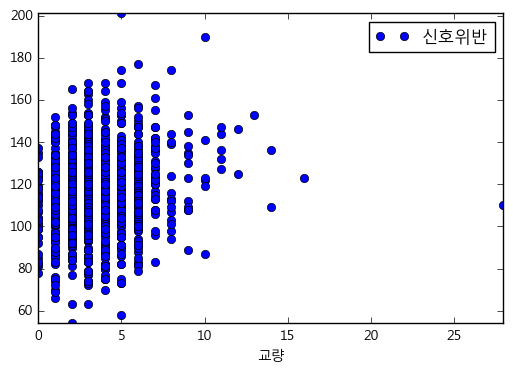

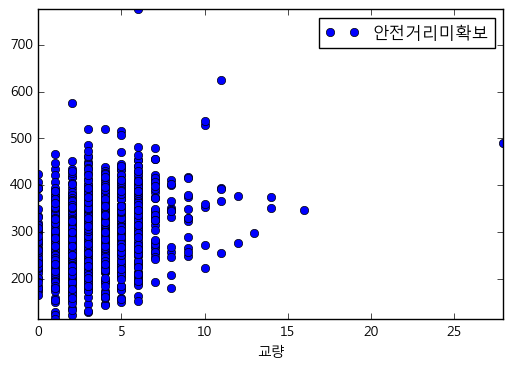

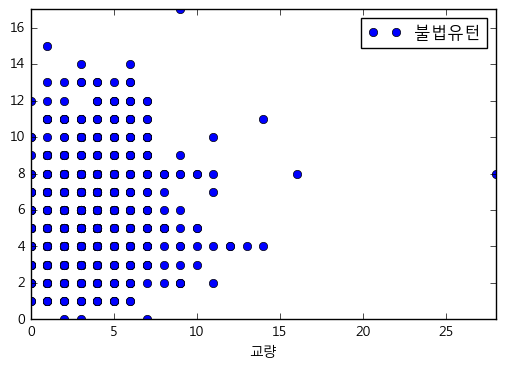

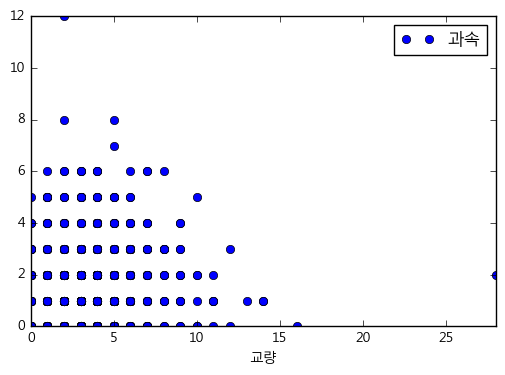

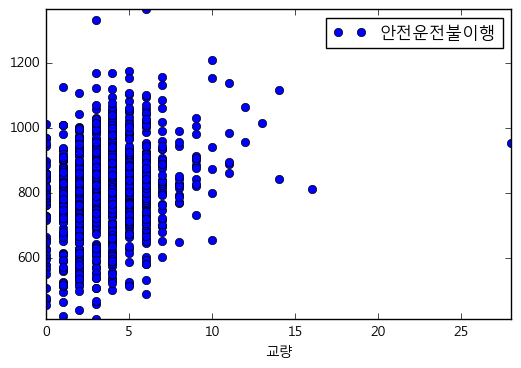

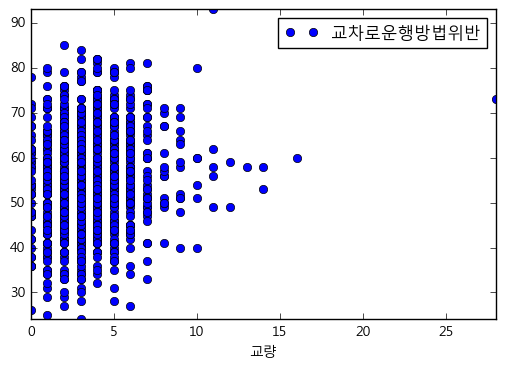

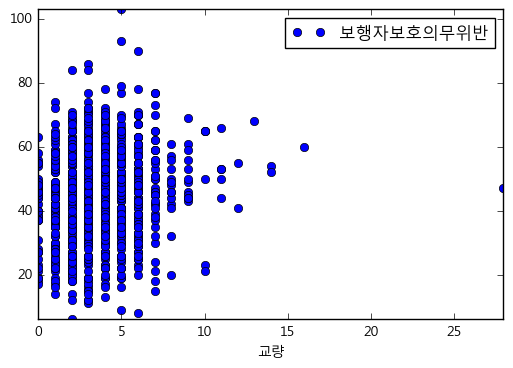

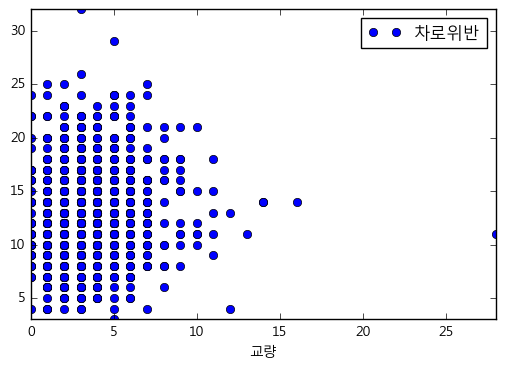

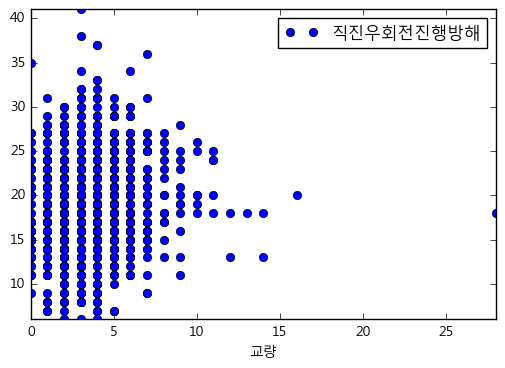

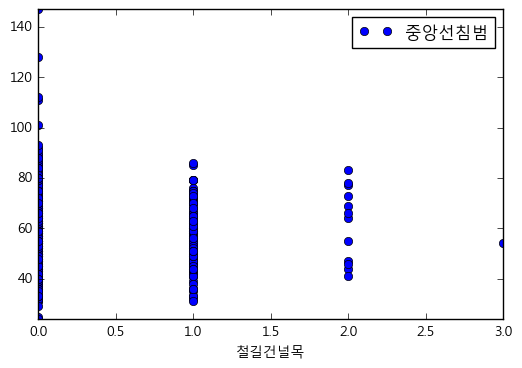

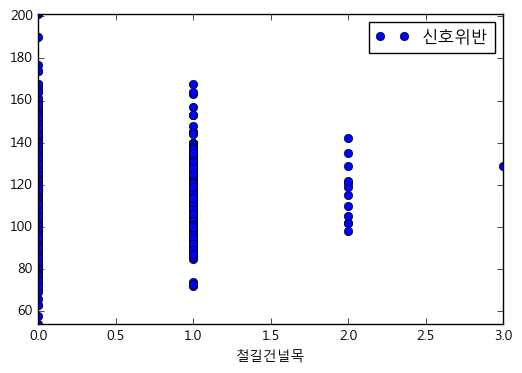

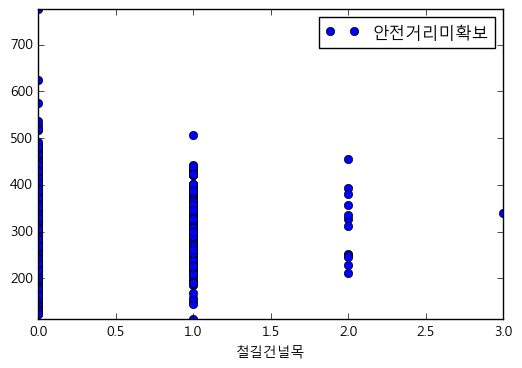

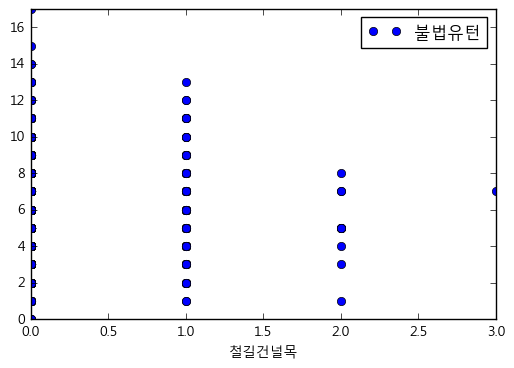

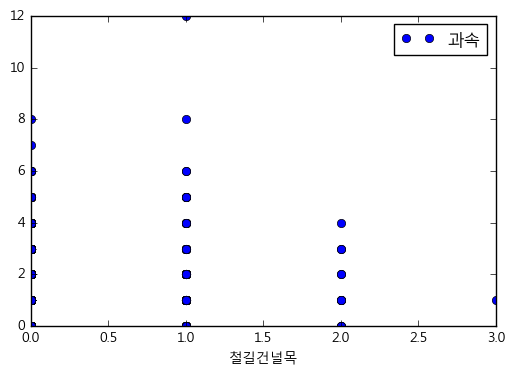

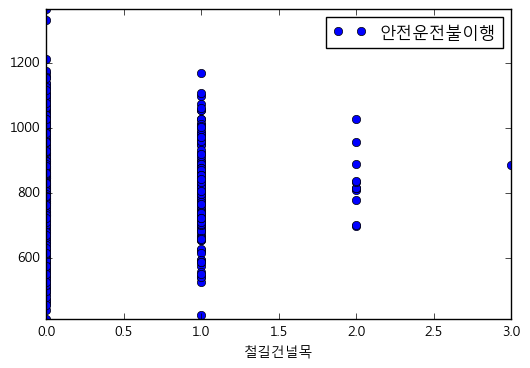

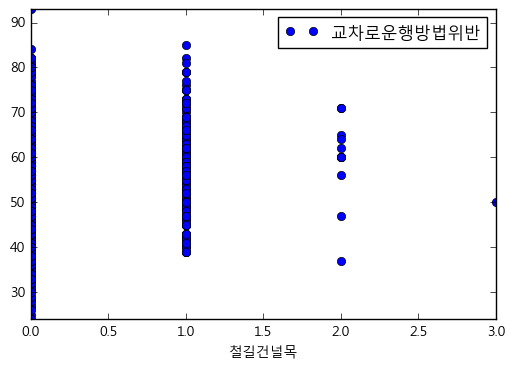

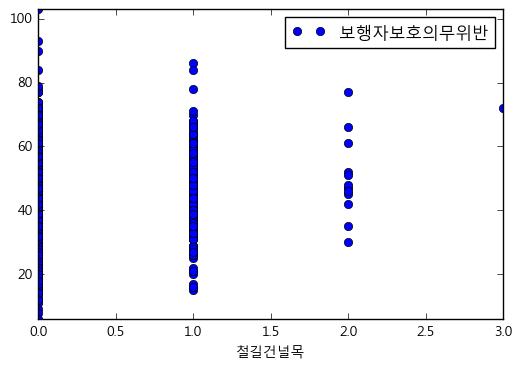

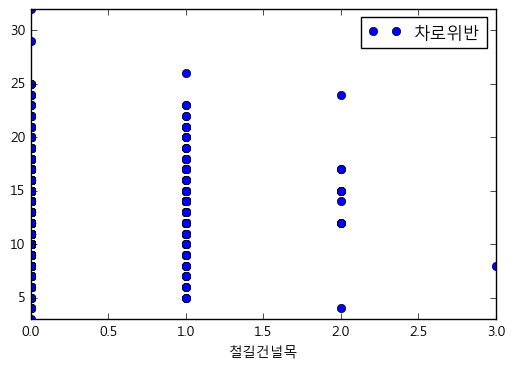

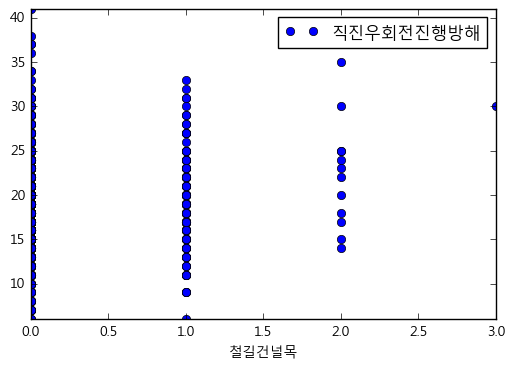

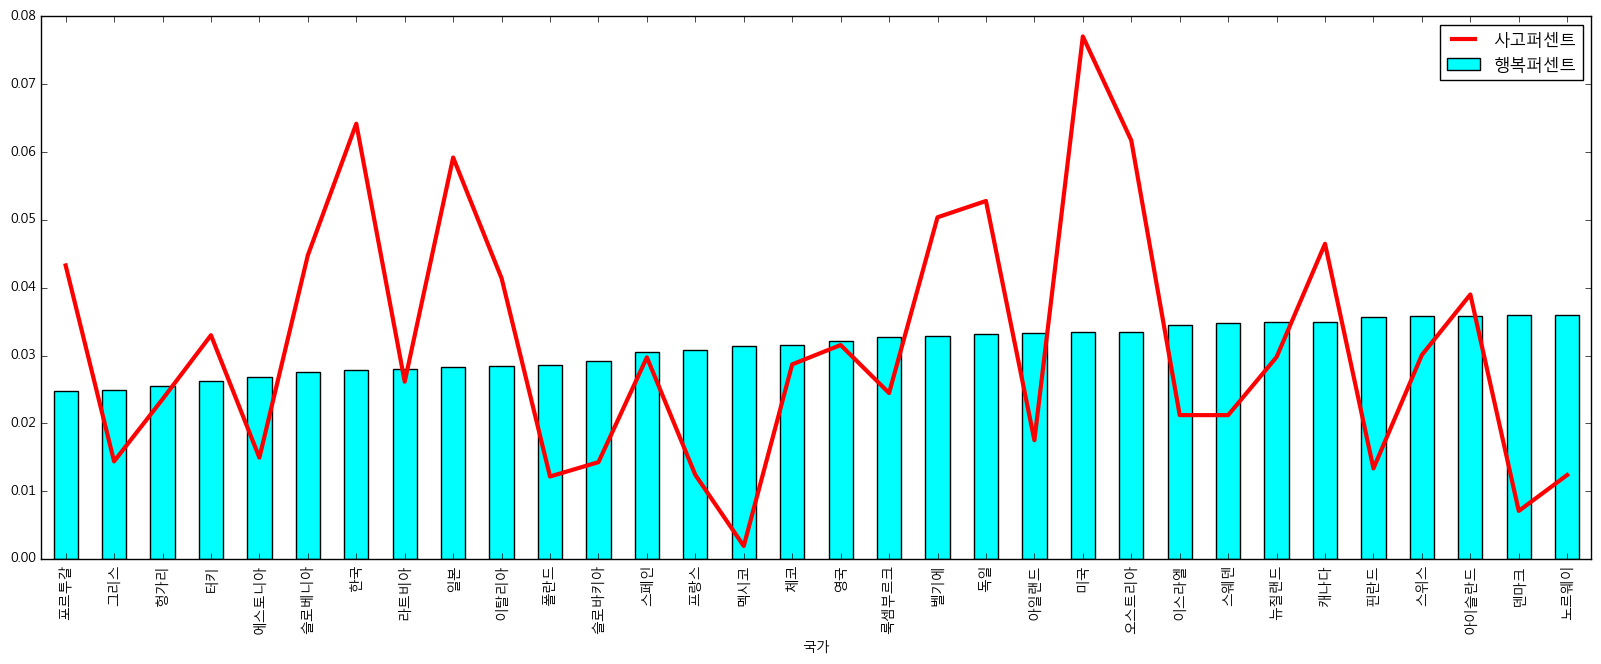

In [22]:
people = pd.read_excel('OECD GDP.xlsx')
del people['2015']
del people['2015.1']
del people['2015.3']
del people['2015.4']
del people['2015.5']
del people['2015.6']
del people['2015.7']
del people['2015.8']
del people['2015.9']
people.columns = ['국가','인구수']
people.iloc[:,0] = people.iloc[:,0].str.replace('\u3000\u3000\u3000','')
df2 = pd.merge(df,people,how='inner')
df2['인구당사고'] = df2['교통사고발생건수(건)']/df2['인구수']
df2 = df2.sort_values('인구당사고')
df2['사고퍼센트'] = df2['인구당사고']/df2['인구당사고'].sum()
df2['행복퍼센트'] = df2['행복지수']/df2['행복지수'].sum()
df2 = df2.sort_values('행복지수')
ax = df2.plot(x='국가', y = '사고퍼센트', color='red', lw=3)
df2.plot.bar(x='국가', y = '행복퍼센트', ax = ax, lw = 1, color='cyan' , width = 0.5 , figsize = (20,7))

plt.show()